In [1]:
import pandas as pd
import numpy as np
import os
from pathlib import Path
import pickle
from multiprocessing import Pool
from runpy import run_path

import time
import sys

ABPRED_DIR = Path.cwd().parent
if ABPRED_DIR not in sys.path:
    sys.path.append(str(ABPRED_DIR))
    
from AbPred.interface_contacts import InterfaceContacts
from AbPred.features_ic import ArpeggioFeatures,features15,features300,features400
from AbPred.FoldX import FoldX
from features3D.Structural import run_pops
from features3D.Structural import POPS_parse2
from AbPred.FoldX import names_stability_complex_wt,names_stability_complex_mut
from AbPred.FoldX import read_analyse_complex
from AbPred.FoldX import convert_features_to_differences
from biopandas.pdb import PandasPdb
import prody


/mnt/d/Python_projects/AbPred/AbPred/../libs/arpeggio


In [95]:
def Kd_2_dG(Kd):
    deltaG = np.log(Kd)*(8.314/4.184)*(298.15)
    
    return deltaG

In [94]:
8.314/4184

0.001987093690248566

In [2]:
CWD = Path.cwd()


# PDBs dir
PDBS_WT = Path("skempiAB-wtRepair/")
PDBS_MUT = Path("skempiAB-mutRepair/")
# Dataframe , sort to match pdbfiles order
ab_data_singleMut = pd.read_csv('../data/skempi_ABlike_singleMut.Final.csv',index_col=0)

ab_data_singleMut['pdb_mutation'] = ab_data_singleMut.pdb_mutation.str.split('_',expand=True)[0]+\
'.'+ab_data_singleMut.pdb_mutation.str.split('_',expand=True)[3].str[1:]
ab_data_singleMut.sort_values('pdb_mutation',inplace=True)


# Add column with partner info
ab_data_singleMut["Partners(A_B)"] = ab_data_singleMut['#Pdb'].str.split('_',n=1,expand=True)[1]
# reset index
ab_data_singleMut.reset_index(inplace=True)
ab_data_singleMut.pdb_mutation

# PDB files
pdbs_mut = list(PDBS_MUT.glob('*Repair4.pdb'))
pdbs_wt = list(PDBS_WT.glob('*Repair4.pdb'))

In [3]:
ab_data_singleMut.shape

(696, 33)

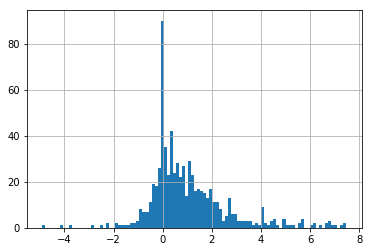

In [4]:
%matplotlib inline
ab_data_singleMut["ddG"].hist(bins=100)

# Clean structures to run arpeggio

In [3]:
TOOLS_DIR = ABPRED_DIR/"libs/tools"
CLEANPDB = TOOLS_DIR / "clean_pdb.py"

In [123]:
def run_cleanpdb(pdb):
    sys.argv = ["",pdb]
    run_path(str(CLEANPDB),run_name="__main__")

In [ ]:
with Pool(12) as p:
    print(p.map(run_cleanpdb, [str(pdb) for pdb in pdbs_mut]))

In [3]:
pdbs_clean_mut = list(PDBS_MUT.glob('*clean.pdb'))


In [134]:
# wildtype
with Pool(12) as p:
    print(p.map(run_cleanpdb, [str(pdb) for pdb in pdbs_wt]))

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element ''
  w

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OH) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element ''
  

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CH2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE2) with given element ''


/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG2) with given element '

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD1) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NZ) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE2) with given element '

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OH) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OH) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD2) with given element ''

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE3) with given elemen

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH2) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CH2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OH) with given element '

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NZ) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CH2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ2) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OXT) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OXT) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OXT) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OXT) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OXT) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element ''
  

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE1) with given elemen

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND2) with given element ''

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NZ) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CH2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SG) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE2) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH2) with given element '

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CH2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG2) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD1) with given elemen

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE1) with given element '

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NZ) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SG) with given element '

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NZ) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OXT) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OXT) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE2) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NZ) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG1) with given element ''

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ2) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE2) with given element '

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD2) with given elemen

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE2) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG2) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OH) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OH) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OXT) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND2) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OH) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element ''
 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OH) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element ''


/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD2) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element ''
  

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element ''
  w

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CH2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element ''
  w

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OH) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CH2) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ) with given element ''

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE1) with given element ''


/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CH2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NZ) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element ''

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OXT) with given elemen

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OH) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SD) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OH) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OXT) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE1) with given element ''


/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CH2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NZ) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG1) with given elemen

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE1) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OH) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NZ) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE1) with given element '

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH1) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OH) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NZ) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OH) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE1) with given element '

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element ''
  w

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element ''

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element ''

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ2) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OXT) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH2) with given element '

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG1) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG1) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ3) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OH) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE) with given element '

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ2) with given elemen

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OH) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ2) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CH2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NZ) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OXT) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element ''
 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element ''
  w

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD1) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG1) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CH2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND1) with given elemen

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD2) with given element ''


/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CH2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH2) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OH) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE1) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CH2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NZ) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE3) with given element ''


/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OXT) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OXT) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element ''
  w

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE1) with given elemen

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE1) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element '

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OH) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND2) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE2) with given element '

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ2) with given elemen

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE1) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD2) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OXT) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OXT) with given elemen

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OXT) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element ''
 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG) with given element ''
  

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG1) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE1) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CH2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD2) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD2) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH2) with given element '

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SD) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CH2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NZ) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CH2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NZ) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ3) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ2) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG) with given element ''
  

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG) with given element ''
  

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OH) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD2) with given elemen

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE2) with given elemen

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE) with given element '

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD2) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD) with given element ''
 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE) with given element '

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG2) with given elemen

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CH2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OXT) with given elemen

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OH) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element ''
  w

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD2) with given elemen

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD1) with given elemen

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD2) with given elemen

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG1) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE2) with given elemen

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH1) with given element '

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE1) with given element ''
 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ3) with given elemen

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OH) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ2) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CH2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NZ) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element ''

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG) with given element ''

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NZ) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND2) with given element '

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OXT) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE1) with given element '

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CH2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE2) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD2) with given elemen

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE1) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NZ) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE) with given element ''
  

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD2) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OH) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD1) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE2) with given elemen

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OH) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element ''

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CH2) with given elemen

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OH) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NZ) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SD) with given element ''

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SG) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element ''
  w

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OH) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE3) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE1) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE2) with given elemen

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element ''


/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NZ) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OH) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SD) with given element '

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OH) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element ''
 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OH) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ2) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OH) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ3) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE1) with given elemen

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OXT) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element ''

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element ''
  w

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD) with given element ''
  

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG) with given element ''

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OH) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE1) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD2) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OH) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE1) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE2) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE3) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OH) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CH2) with given elemen

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE1) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NZ) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OXT) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OXT) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SD) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE2) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG) with given element ''
  

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element ''
  w

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND2) with given elemen

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG2) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OH) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE1) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OH) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG) with given element ''


/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CH2) with given elemen

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CH2) with given elemen

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG2) with given element ''


/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CH2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NZ) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG) with given element '

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OH) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CH2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ) with given element ''

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE1) with given element ''


/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD1) with given elemen

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD2) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG1) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OH) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OH) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE1) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG1) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG1) with given elemen

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD) with given element ''


/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OH) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OXT) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SD) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element ''

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CH2) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD) with given element ''
  

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OXT) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG2) with given elemen

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OXT) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG1) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OH) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SD) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND1) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND2) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OH) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG1) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CH2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NZ) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OXT) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE) with given element ''

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE1) with given element '

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG) with given element ''
  

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element ''

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD2) with given elemen

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CH2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element '

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SD) with given element ''


/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG) with given element ''


/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND2) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element ''
  wa

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element '

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NZ) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OXT) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OXT) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SD) with given element '

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NZ) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OXT) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element ''

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH2) with given elemen

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NZ) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND2) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element ''


/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OH) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE2) with given elemen

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE1) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD2) with given element '

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NZ) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OH) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND1) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OXT) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OH) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE2) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element ''
 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CH2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OH) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NZ) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OH) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NZ) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OXT) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element ''

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE2) with given elemen

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG2) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG2) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD2) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element ''
  

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OH) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NZ) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NZ) with given element ''

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG1) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND2) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE1) with given element ''


/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ3) with given elemen

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ3) with given elemen

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CH2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NZ) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element '

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NZ) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OXT) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element ''
 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE1) with given element ''


/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG1) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG2) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG1) with given elemen

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE2) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ) with given element ''

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD1) with given elemen

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CH2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OH) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OH) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE3) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CH2) with given elemen

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CH2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OH) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NZ) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE2) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SG) with given element '

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SD) with given element ''
  

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG1) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE2) with given elemen

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE1) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG1) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OXT) with given element '

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH1) with given element ''

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE1) with given elemen

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD) with given element ''

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CH2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NZ) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CH2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OH) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NZ) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element ''
  w

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD1) with given element ''
 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SD) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE3) with given elemen

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OXT) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE1) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NZ) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OXT) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD1) with given element '

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH1) with given element ''

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE) with given element ''
  

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OH) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE1) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OH) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE) with given element ''

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD2) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OXT) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CH2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NZ) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element ''

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OH) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE2) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG) with given element ''
  

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD2) with given elemen

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE3) with given elemen

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG1) with given elemen

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE1) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE3) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE2) with given elemen

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OH) with given element '

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CH2) with given elemen

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG2) with given elemen

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OH) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE2) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CH2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD2) with given element ''

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE2) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE2) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NZ) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD2) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG) with given element '

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CH2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE1) with given elemen

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND2) with given elemen

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CH2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OH) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CH2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH1) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE) with given element ''

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD1) with given element ''

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ3) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element '

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SG) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE) with given element '

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE1) with given elemen

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND1) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE1) with given element ''


/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OH) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OXT) with given element '

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ3) with given elemen

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OXT) with given elemen

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NZ) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element ''
  

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE1) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG1) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD) with given element ''

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE2) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ3) with given elemen

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OH) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE1) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SG) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OH) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE2) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CH2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OH) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NZ) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OXT) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OXT) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element ''

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element ''
  w

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element ''


/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SG) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG2) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CH2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE2) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NZ) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND2) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OH) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE1) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OH) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ3) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE2) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CH2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OH) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NZ) with given element '

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NZ) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OXT) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element ''

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element ''
 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ) with given element '

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE2) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD2) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NZ) with given element '

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OH) with given element '

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CH2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CH2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OH) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD2) with given elemen

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CH2) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG1) with given element ''
 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE1) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE1) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD2) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ2) with given elemen

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OXT) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SG) with given element '

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH2) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OH) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH2) with given element '

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND1) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OXT) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element ''

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE1) with given element '

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SD) with given element '

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD1) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE1) with given elemen

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ) with given element '

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NZ) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE2) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OH) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ2) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CH2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH1) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SD) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ3) with given elemen

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OXT) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element ''
  

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD1) with given element ''
 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OH) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OH) with given element ''

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD2) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NZ) with given element '

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NZ) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE1) with given element '

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CH2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND1) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE2) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CH2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH2) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ3) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element ''


/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element ''
  w

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG) with given element ''
  

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG1) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG2) with given element '

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND2) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CH2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OH) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE3) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CH2) with given elemen

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ3) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND1) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element ''
  w

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element ''
  w

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE2) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE2) with given elemen

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH2) with given element '

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NZ) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG1) with given element '

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NZ) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE2) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND2) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OH) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE) with given element '

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CH2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH1) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SD) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OXT) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element '

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG1) with given element ''
 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG) with given element '

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CH2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SG) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE2) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE2) with given elemen

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NZ) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SG) with given element ''

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NZ) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE1) with given element '

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OXT) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OH) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OH) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ2) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NZ) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE2) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND1) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CH2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element ''
  w

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OXT) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG) with given element ''
 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD2) with given element ''

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD1) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ2) with given elemen

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SG) with given element '

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OH) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE1) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OH) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD2) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CH2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND1) with given elemen

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CH2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND2) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OXT) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OXT) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NA) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element ''


/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NZ) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SG) with given element '

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE) with given element '

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD2) with given elemen

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NZ) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE) with given element '

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CH2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE2) with given elemen

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CH2) with given elemen

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND2) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE3) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ2) with given elemen

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND1) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CH2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OXT) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element '

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element ''
  w

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG1) with given element '

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD1) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OXT) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD2) with given elemen

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH1) with given element '

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE1) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SG) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH2) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OH) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE3) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG1) with given elemen

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NZ) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OXT) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NA) with given element ''

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OXT) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element ''
 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG1) with given element ''
 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG1) with given element '

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG1) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD2) with given elemen

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE2) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OXT) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ) with given element '

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CH2) with given elemen

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CH2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE2) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD) with given element ''
 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ3) with given elemen

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CH2) with given elemen

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NZ) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OXT) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NA) with given element ''

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OXT) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element ''
 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element ''
  w

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG1) with given element '

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD1) with given elemen

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ) with given element '

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD2) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NZ) with given element '

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE1) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH2) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OH) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD2) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ3) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CH2) with given elemen

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CH2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OXT) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND1) with given elemen

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NZ) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NA) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element ''
 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NA) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OXT) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element ''
 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG1) with given element ''
 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NZ) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OH) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SD) with given element '

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD1) with given elemen

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE2) with given elemen

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OXT) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ3) with given elemen

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NZ) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ) with given element '

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OH) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OH) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OXT) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD2) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE1) with given elemen

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OH) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE) with given element '

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CH2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element ''

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OXT) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NA) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element ''


/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OXT) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element ''
  

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD) with given element ''
  

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG1) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE1) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OXT) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NZ) with given element '

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NZ) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SG) with given element ''

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH1) with given element '

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH2) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SG) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OH) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG1) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE3) with given elemen

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CH2) with given elemen

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CH2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OXT) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element '

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OXT) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element ''
  

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG2) with given element ''


/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE2) with given element '

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD2) with given elemen

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NZ) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE2) with given element ''

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH1) with given element '

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE3) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG2) with given element ''

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CH2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE3) with given elemen

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG1) with given element '

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CH2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OXT) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OXT) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element '

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element ''
  w

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE1) with given element ''


/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG2) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NZ) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD1) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NZ) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG1) with given element '

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OH) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND2) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OH) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD1) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OH) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH1) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE3) with given elemen

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CH2) with given elemen

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CH2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OXT) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OXT) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element ''
  

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD) with given element ''
  

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG1) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE) with given element '

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE3) with given elemen

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH2) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE2) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG) with given element ''
  

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD) with given element '

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CH2) with given elemen

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CH2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SD) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OXT) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element '

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element ''
  w

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD2) with given element '

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD2) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD2) with given elemen

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NZ) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE) with given element ''

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE3) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE1) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ) with given element '

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OH) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE1) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CH2) with given elemen

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CH2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OXT) with given elemen

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CH2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OXT) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OXT) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element ''
  

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG1) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OH) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NZ) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE) with given element ''

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OH) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND1) with given element '

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OH) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD2) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CH2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD2) with given elemen

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OXT) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND2) with given elemen

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CH2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OXT) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OXT) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element ''


/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG) with given element ''
  

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG1) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD1) with given elemen

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NZ) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SG) with given element ''

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NZ) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD2) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH1) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CH2) with given elemen

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH2) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OH) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD1) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD2) with given elemen

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OXT) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element ''

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element ''
  w

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE1) with given element ''


/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG2) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SG) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ) with given element '

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SG) with given element '

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ) with given element '

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OH) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ3) with given elemen

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ3) with given elemen

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CH2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OXT) with given elemen

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OH) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OXT) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element ''

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OXT) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element ''
  

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD1) with given element ''
 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD1) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NZ) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE1) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ) with given element '

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE1) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE1) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD2) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OH) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE1) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CH2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OH) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND2) with given elemen

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE3) with given elemen

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element ''
 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG1) with given element ''
 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE2) with given element '

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD1) with given elemen

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH1) with given element '

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG1) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH1) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OH) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND2) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OH) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH2) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ3) with given elemen

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CH2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND1) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OXT) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element '

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element ''
  w

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE1) with given element ''


/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD2) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD2) with given elemen

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH1) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NZ) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD1) with given element '

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NZ) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SG) with given element ''

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND1) with given elemen

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OH) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ2) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ2) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CH2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD2) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OXT) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element '

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OXT) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element ''
  

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD) with given element ''
  

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD1) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE1) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD2) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH2) with given element '

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE2) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OH) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SD) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE3) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CH2) with given elemen

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CH2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NZ) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OXT) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OXT) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element ''


/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NZ) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG1) with given element ''

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD) with given element '

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD1) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CD2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OG) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CG1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND2) with given elemen

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NZ) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OD2) with given element 

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NH2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SG) with given element '

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SG) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OH) with given element '

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OH) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ2) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'S' for Atom (name=SD) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=NE1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ2) with given element

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CE3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CZ3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CH2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND1) with given elemen

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'C' for Atom (name=CH2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'N' for Atom (name=ND1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/Bio/PDB/Atom.py:185: PDBConstructionWarning: Used element 'O' for Atom (name=OXT) with given element ''
  warnings.warn(msg, PDBConstructionWarning)


[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, Non

In [4]:
pdbs_clean_wt = list(PDBS_WT.glob('*clean.pdb'))


In [5]:
len(pdbs_clean_wt)

0

# Calcule contact data mutant

In [125]:
def main(i,pdbfile):
    
    partners_pdbs = ab_data_singleMut["Partners(A_B)"].iloc[i]
    ic = InterfaceContacts(pdbfile)
    print("### Running arpeggio ###")
    print("Getting contact on ", pdbfile.name)
    ic.run_arpeggio()
    time.sleep(5)
    ic.get_ic(partners=partners_pdbs)
    print("Finish getting interface contact\n")
    #ic.get_pymol_contacts()
    print("### END ###\n")

In [ ]:
with Pool(12) as p:
    print(p.starmap(main, enumerate(pdbs_clean_mut)))

In [4]:
# check pdb procced
ic_filesMUT = list(PDBS_MUT.glob("*.interface_contacts"))
len(ic_filesMUT)

728

In [138]:
# wildtype
with Pool(12) as p:
    print(p.starmap(main, enumerate(pdbs_clean_wt)))

### Running arpeggio ###
### Running arpeggio ###
### Running arpeggio ###
### Running arpeggio ###
### Running arpeggio ###
### Running arpeggio ###
Getting contact on  1AHW.protein.C145A.mut.C145Y.Repair4.clean.pdb
Getting contact on  1BJ1.protein.H54W.mut.H54Y.Repair4.clean.pdb
Getting contact on  1DVF.protein.D33A.mut.D33H.Repair4.clean.pdb
### Running arpeggio ###
### Running arpeggio ###
### Running arpeggio ###
Getting contact on  1DQJ.protein.C20A.mut.C20Y.Repair4.clean.pdb
### Running arpeggio ###
### Running arpeggio ###
### Running arpeggio ###
Getting contact on  1DVF.protein.B101A.mut.B101Y.Repair4.clean.pdb
Getting contact on  1JRH.protein.I37M.mut.I37K.Repair4.clean.pdb
Getting contact on  1KIR.protein.A50Y.mut.A50S.Repair4.clean.pdb
Getting contact on  1MHP.protein.H50Q.mut.H50T.Repair4.clean.pdb
Getting contact on  1JRH.protein.I69A.mut.I69N.Repair4.clean.pdb
Getting contact on  1MHP.protein.H58Q.mut.H58Y.Repair4.clean.pdb
Getting contact on  1MHP.protein.L30K.mut.L30H

Getting only interface contacts
Finish getting interface contact

### END ###

### Running arpeggio ###
Getting contact on  1JRH.protein.I40A.mut.I40G.Repair4.clean.pdb
Getting only interface contacts
Finish getting interface contact

### END ###

### Running arpeggio ###
Getting contact on  1JRH.protein.I88A.mut.I88K.Repair4.clean.pdb
Getting only interface contacts
Finish getting interface contact

### END ###

### Running arpeggio ###
Getting contact on  1JRH.protein.H104A.mut.H104Y.Repair4.clean.pdb
Getting only interface contacts
Finish getting interface contact

### END ###

### Running arpeggio ###
Getting contact on  1DVF.protein.B54A.mut.B54D.Repair4.clean.pdb
Getting only interface contacts
Finish getting interface contact

### END ###

### Running arpeggio ###
Getting contact on  1MHP.protein.H53A.mut.H53G.Repair4.clean.pdb
Getting only interface contacts
Finish getting interface contact

### END ###

### Running arpeggio ###
Getting contact on  1MHP.protein.L92D.mut.L92N.Re


### END ###

### Running arpeggio ###
Getting contact on  1MHP.protein.H64Q.mut.H64K.Repair4.clean.pdb
Getting only interface contacts
Finish getting interface contact

### END ###

### Running arpeggio ###
Getting contact on  1DQJ.protein.C97A.mut.C97K.Repair4.clean.pdb
Getting only interface contacts
Finish getting interface contact

### END ###

### Running arpeggio ###
Getting contact on  1AHW.protein.C187A.mut.C187V.Repair4.clean.pdb
Getting only interface contacts
Finish getting interface contact

### END ###

### Running arpeggio ###
Getting contact on  1MHP.protein.H31Q.mut.H31R.Repair4.clean.pdb
Getting only interface contacts
Finish getting interface contact

### END ###

### Running arpeggio ###
Getting contact on  1JRH.protein.I44A.mut.I44S.Repair4.clean.pdb
Getting only interface contacts
Finish getting interface contact

### END ###

### Running arpeggio ###
Getting contact on  1JRH.protein.L92A.mut.L92W.Repair4.clean.pdb
Getting only interface contacts
Finish getting in

Getting only interface contacts
Finish getting interface contact

### END ###

### Running arpeggio ###
Getting contact on  1KIP.protein.B32Y.mut.B32A.Repair4.clean.pdb
Getting only interface contacts
Finish getting interface contact

### END ###

### Running arpeggio ###
Getting contact on  1DVF.protein.D106A.mut.D106R.Repair4.clean.pdb
Getting only interface contacts
Finish getting interface contact

### END ###

### Running arpeggio ###
Getting contact on  1MHP.protein.H54N.mut.H54G.Repair4.clean.pdb
Getting only interface contacts
Finish getting interface contact

### END ###

### Running arpeggio ###
Getting contact on  1MHP.protein.L51Y.mut.L51N.Repair4.clean.pdb
Getting only interface contacts
Finish getting interface contact

### END ###

### Running arpeggio ###
Getting contact on  1MHP.protein.L27Q.mut.L27S.Repair4.clean.pdb
Getting only interface contacts
Finish getting interface contact

### END ###

### Running arpeggio ###
Getting contact on  1DVF.protein.A92A.mut.A92W.Re


### END ###

### Running arpeggio ###
Getting contact on  1MHP.protein.H50E.mut.H50T.Repair4.clean.pdb
Getting only interface contacts
Finish getting interface contact

### END ###

### Running arpeggio ###
Getting contact on  1VFB.protein.B52A.mut.B52W.Repair4.clean.pdb
Getting only interface contacts
Finish getting interface contact

### END ###

### Running arpeggio ###
Getting contact on  1NMB.protein.H57E.mut.H57D.Repair4.clean.pdb
Getting only interface contacts
Finish getting interface contact

### END ###

### Running arpeggio ###
Getting contact on  1BJ1.protein.H31H.mut.H31N.Repair4.clean.pdb
Getting only interface contacts
Finish getting interface contact

### END ###

### Running arpeggio ###
Getting contact on  1VFB.protein.C124A.mut.C124I.Repair4.clean.pdb
Getting only interface contacts
Finish getting interface contact

### END ###

### Running arpeggio ###
Getting contact on  1VFB.protein.A92A.mut.A92W.Repair4.clean.pdb
Getting only interface contacts
Finish getting in

Getting only interface contacts
Finish getting interface contact

### END ###

### Running arpeggio ###
Getting contact on  1VFB.protein.B28D.mut.B28S.Repair4.clean.pdb
Getting only interface contacts
Finish getting interface contact

### END ###

### Running arpeggio ###
Getting contact on  1VFB.protein.B98A.mut.B98E.Repair4.clean.pdb
Getting only interface contacts
Finish getting interface contact

### END ###

### Running arpeggio ###
Getting contact on  2JEL.protein.P2W.mut.P2F.Repair4.clean.pdb
Getting only interface contacts
Finish getting interface contact

### END ###

### Running arpeggio ###
Getting contact on  1VFB.protein.C24A.mut.C24S.Repair4.clean.pdb
Getting only interface contacts
Finish getting interface contact

### END ###

### Running arpeggio ###
Getting contact on  2JEL.protein.P64T.mut.P64S.Repair4.clean.pdb
Getting only interface contacts
Finish getting interface contact

### END ###

### Running arpeggio ###
Getting contact on  1NMB.protein.L93W.mut.L93T.Repair


### Running arpeggio ###
Getting contact on  2BDN.protein.L31R.mut.L31N.Repair4.clean.pdb
Getting only interface contacts
Finish getting interface contact

### END ###

### Running arpeggio ###
Getting contact on  2JEL.protein.P85K.mut.P85E.Repair4.clean.pdb
Getting only interface contacts
Getting only interface contacts
Finish getting interface contact

### END ###

### Running arpeggio ###
Getting contact on  1VFB.protein.B31E.mut.B31G.Repair4.clean.pdb
Finish getting interface contact

### END ###

### Running arpeggio ###
Getting contact on  1VFB.protein.A32A.mut.A32Y.Repair4.clean.pdb
Getting only interface contacts
Finish getting interface contact

### END ###

### Running arpeggio ###
Getting contact on  1VFB.protein.C119A.mut.C119D.Repair4.clean.pdb
Getting only interface contacts
Finish getting interface contact

### END ###

### Running arpeggio ###
Getting contact on  1YY9.protein.C93A.mut.C93N.Repair4.clean.pdb
Getting only interface contacts
Finish getting interface conta

Getting only interface contacts
Finish getting interface contact

### END ###

### Running arpeggio ###
Getting contact on  2JEL.protein.P12D.mut.P12N.Repair4.clean.pdb
Getting only interface contacts
Getting only interface contacts
Finish getting interface contact

### END ###

### Running arpeggio ###
Getting contact on  2NYY.protein.D30D.mut.D30Y.Repair4.clean.pdb
Finish getting interface contact

### END ###

### Running arpeggio ###
Getting contact on  2NZ9.protein.A889A.mut.A889F.Repair4.clean.pdb
Getting only interface contacts
Finish getting interface contact

### END ###

### Running arpeggio ###
Getting contact on  3BN9.protein.B52A.mut.B52Y.Repair4.clean.pdb
Getting only interface contacts
Finish getting interface contact

### END ###

### Running arpeggio ###
Getting contact on  1YQV.protein.Y45K.mut.Y45R.Repair4.clean.pdb
Getting only interface contacts
Finish getting interface contact

### END ###

### Running arpeggio ###
Getting contact on  2JEL.protein.P57E.mut.P57Q.Re


### END ###

### Running arpeggio ###
Getting contact on  3BN9.protein.B92A.mut.B92F.Repair4.clean.pdb
Getting only interface contacts
Finish getting interface contact

### END ###

### Running arpeggio ###
Getting contact on  3HFM.protein.Y101G.mut.Y101D.Repair4.clean.pdb
Getting only interface contacts
Finish getting interface contact

### END ###

### Running arpeggio ###
Getting contact on  3HFM.protein.H32N.mut.H32D.Repair4.clean.pdb
Getting only interface contacts
Finish getting interface contact

### END ###

### Running arpeggio ###
Getting contact on  2NYY.protein.A890A.mut.A890N.Repair4.clean.pdb
Getting only interface contacts
Getting only interface contacts
Finish getting interface contact

### END ###

### Running arpeggio ###
Getting contact on  1NCA.protein.H100D.mut.H100E.Repair4.clean.pdb
Finish getting interface contact

### END ###

### Running arpeggio ###
Getting contact on  1YY9.protein.D54P.mut.D54G.Repair4.clean.pdb
Getting only interface contacts
Finish gettin

Getting contact on  3HFM.protein.H50F.mut.H50Y.Repair4.clean.pdb
Getting only interface contacts
Finish getting interface contact

### END ###

### Running arpeggio ###
Getting contact on  1YY9.protein.D98P.mut.D98A.Repair4.clean.pdb
Getting only interface contacts
Finish getting interface contact

### END ###

### Running arpeggio ###
Getting contact on  3BN9.protein.B46A.mut.B46D.Repair4.clean.pdb
Getting only interface contacts
Finish getting interface contact

### END ###

### Running arpeggio ###
Getting contact on  3HFM.protein.L50F.mut.L50Y.Repair4.clean.pdb
Getting only interface contacts
Finish getting interface contact

### END ###

### Running arpeggio ###
Getting contact on  3HFM.protein.Y21N.mut.Y21R.Repair4.clean.pdb
Getting only interface contacts
Finish getting interface contact

### END ###

### Running arpeggio ###
Getting contact on  3HFM.protein.Y96A.mut.Y96K.Repair4.clean.pdb
Getting only interface contacts
Finish getting interface contact

### END ###

### Running

Finish getting interface contact

### END ###

### Running arpeggio ###
Getting contact on  3NGB.protein.H70A.mut.H70M.Repair4.clean.pdb
Getting only interface contacts
Finish getting interface contact

### END ###

### Running arpeggio ###
Getting contact on  3N85.protein.H32Y.mut.H32S.Repair4.clean.pdb
Getting only interface contacts
Finish getting interface contact

### END ###

### Running arpeggio ###
Getting contact on  3HFM.protein.Y89A.mut.Y89T.Repair4.clean.pdb
Getting only interface contacts
Finish getting interface contact

### END ###

### Running arpeggio ###
Getting contact on  3NPS.protein.A141A.mut.A141Y.Repair4.clean.pdb
Getting only interface contacts
Finish getting interface contact

### END ###

### Running arpeggio ###
Getting contact on  3HFM.protein.Y97G.mut.Y97K.Repair4.clean.pdb
Getting only interface contacts
Getting only interface contacts
Finish getting interface contact

### END ###

### Running arpeggio ###
Getting contact on  2NZ9.protein.A895A.mut.A895K.

Getting contact on  3NPS.protein.A90A.mut.A90N.Repair4.clean.pdb
Getting only interface contacts
Finish getting interface contact

### END ###

### Running arpeggio ###
Getting contact on  3SE8.protein.H58A.mut.H58V.Repair4.clean.pdb
Getting only interface contacts
Finish getting interface contact

### END ###

### Running arpeggio ###
Getting contact on  3NGB.protein.H56A.mut.H56G.Repair4.clean.pdb
Getting only interface contacts
Finish getting interface contact

### END ###

### Running arpeggio ###
Getting contact on  3LZF.protein.A222G.mut.A222D.Repair4.clean.pdb
Getting only interface contacts
Finish getting interface contact

### END ###

### Running arpeggio ###
Getting contact on  3NGB.protein.H75S.mut.H75Y.Repair4.clean.pdb
Getting only interface contacts
Finish getting interface contact

### END ###

### Running arpeggio ###
Getting contact on  3NPS.protein.A214A.mut.A214D.Repair4.clean.pdb
Getting only interface contacts
Finish getting interface contact

### END ###

### Run

Getting only interface contacts
Finish getting interface contact

### END ###

### Running arpeggio ###
Getting contact on  3SE8.protein.H114A.mut.H114D.Repair4.clean.pdb
Getting only interface contacts
Finish getting interface contact

### END ###

### Running arpeggio ###
Getting contact on  3NGB.protein.H106A.mut.H106W.Repair4.clean.pdb
Getting only interface contacts
Finish getting interface contact

### END ###

### Running arpeggio ###
Getting contact on  3NPS.protein.A45A.mut.A45I.Repair4.clean.pdb
Getting only interface contacts
Finish getting interface contact

### END ###

### Running arpeggio ###
Getting contact on  2NZ9.protein.A1030A.mut.A1030D.Repair4.clean.pdb
Getting only interface contacts
Finish getting interface contact

### END ###

### Running arpeggio ###
Getting contact on  3SE9.protein.H62A.mut.H62G.Repair4.clean.pdb
Getting only interface contacts
Finish getting interface contact

### END ###

### Running arpeggio ###
Getting contact on  3W2D.protein.A45F.mut.A


### END ###

### Running arpeggio ###
Getting contact on  3SE9.protein.H51A.mut.H51W.Repair4.clean.pdb
Getting only interface contacts
Finish getting interface contact

### END ###

### Running arpeggio ###
Getting contact on  4ZS6.protein.A160A.mut.A160Y.Repair4.clean.pdb
Getting only interface contacts
Finish getting interface contact

### END ###

### Running arpeggio ###
Getting contact on  4JPK.protein.A130K.mut.A130R.Repair4.clean.pdb
Getting only interface contacts
Finish getting interface contact

### END ###

### Running arpeggio ###
Getting contact on  5C6T.protein.H98A.mut.H98Y.Repair4.clean.pdb
Getting only interface contacts
Finish getting interface contact

### END ###

### Running arpeggio ###
Getting contact on  4NM8.protein.B18M.mut.B18I.Repair4.clean.pdb
Getting only interface contacts
Finish getting interface contact

### END ###

### Running arpeggio ###
Getting contact on  3SE8.protein.L1A.mut.L1E.Repair4.clean.pdb
Getting only interface contacts
Finish getting in


### END ###

### Running arpeggio ###
Getting contact on  3BN9.protein.B140A.mut.B140Q.Repair4.clean.pdb
Getting only interface contacts
Finish getting interface contact

### END ###

### Running arpeggio ###
Getting contact on  4KRL.protein.B112A.mut.B112D.Repair4.clean.pdb
Getting only interface contacts
Finish getting interface contact

### END ###

### Running arpeggio ###
Getting contact on  3SE9.protein.L91A.mut.L91F.Repair4.clean.pdb
Getting only interface contacts
Finish getting interface contact

### END ###

### Running arpeggio ###
Getting contact on  5DWU.protein.B85A.mut.B85Q.Repair4.clean.pdb
Getting only interface contacts
Finish getting interface contact

### END ###

### Running arpeggio ###
Getting contact on  5C6T.protein.A192A.mut.A192F.Repair4.clean.pdb
Getting only interface contacts
Finish getting interface contact

### END ###

### Running arpeggio ###
Getting contact on  3BN9.protein.B141A.mut.B141Y.Repair4.clean.pdb
Getting only interface contacts
Finish gett

Getting only interface contacts
Finish getting interface contact

### END ###

### Running arpeggio ###
Getting contact on  4ZS6.protein.A159A.mut.A159D.Repair4.clean.pdb
Getting only interface contacts
Finish getting interface contact

### END ###

[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None,

In [5]:
# check pdb procced
ic_filesWT = list(PDBS_WT.glob("*.interface_contacts"))
len(ic_filesWT)

728

# Extract contact features 
#### Mutant

In [6]:
def contact_features_(ic_files,pdbs_files,level_contacts='normal'):
    ''' Get interface contact features.
    
    Attributes
    ----------
    level_contact: str
        Level of interface description calculated from ic_file.
        This can be `normal`(15 features), `residue`(300 features) or `pairs`(400 features) '''
    
    if level_contacts == 'normal':
        features = np.empty((len(pdbs_files),15))
        ic_features = ArpeggioFeatures(level_sift="normal")
        
    elif level_contacts == 'residue':
        features = np.empty((len(pdbs_files),300))
        ic_features = ArpeggioFeatures(level_sift="residue")
    elif level_contacts == 'pairs':
        features = np.empty((len(pdbs_files),400))
        ic_features = ArpeggioFeatures(level_sift="pairs")
        
    for i,(ic,pdb) in enumerate(zip(ic_files,pdbs_files)):
        print(ic,pdb)
        ic_features.parse_contactdata(icfile=ic)
        ic_features.parse_pdbdata(pdbfile=pdb)

        contacts = ic_features.get_features()


        features[i] = contacts
        
    return features

In [160]:
data15 = contact_features_(ic_filesMUT,pdbs_clean_mut,level_contacts='normal')

skempiAB-mutRepair/1AHW.protein.C145A.Repair4.clean.interface_contacts skempiAB-mutRepair/1AHW.protein.C145A.Repair4.clean.pdb
skempiAB-mutRepair/1AHW.protein.C146A.Repair4.clean.interface_contacts skempiAB-mutRepair/1AHW.protein.C146A.Repair4.clean.pdb
skempiAB-mutRepair/1AHW.protein.C156A.Repair4.clean.interface_contacts skempiAB-mutRepair/1AHW.protein.C156A.Repair4.clean.pdb
skempiAB-mutRepair/1AHW.protein.C159A.Repair4.clean.interface_contacts skempiAB-mutRepair/1AHW.protein.C159A.Repair4.clean.pdb
skempiAB-mutRepair/1AHW.protein.C165A.Repair4.clean.interface_contacts skempiAB-mutRepair/1AHW.protein.C165A.Repair4.clean.pdb
skempiAB-mutRepair/1AHW.protein.C167A.Repair4.clean.interface_contacts skempiAB-mutRepair/1AHW.protein.C167A.Repair4.clean.pdb
skempiAB-mutRepair/1AHW.protein.C186A.Repair4.clean.interface_contacts skempiAB-mutRepair/1AHW.protein.C186A.Repair4.clean.pdb
skempiAB-mutRepair/1AHW.protein.C187A.Repair4.clean.interface_contacts skempiAB-mutRepair/1AHW.protein.C187A.Re

skempiAB-mutRepair/1DVF.protein.D55A.Repair4.clean.interface_contacts skempiAB-mutRepair/1DVF.protein.D55A.Repair4.clean.pdb
skempiAB-mutRepair/1JRH.protein.H100A.Repair4.clean.interface_contacts skempiAB-mutRepair/1JRH.protein.H100A.Repair4.clean.pdb
skempiAB-mutRepair/1JRH.protein.H103A.Repair4.clean.interface_contacts skempiAB-mutRepair/1JRH.protein.H103A.Repair4.clean.pdb
skempiAB-mutRepair/1JRH.protein.H104A.Repair4.clean.interface_contacts skempiAB-mutRepair/1JRH.protein.H104A.Repair4.clean.pdb
skempiAB-mutRepair/1JRH.protein.H107A.Repair4.clean.interface_contacts skempiAB-mutRepair/1JRH.protein.H107A.Repair4.clean.pdb
skempiAB-mutRepair/1JRH.protein.H32A.Repair4.clean.interface_contacts skempiAB-mutRepair/1JRH.protein.H32A.Repair4.clean.pdb
skempiAB-mutRepair/1JRH.protein.H54A.Repair4.clean.interface_contacts skempiAB-mutRepair/1JRH.protein.H54A.Repair4.clean.pdb
skempiAB-mutRepair/1JRH.protein.H55A.Repair4.clean.interface_contacts skempiAB-mutRepair/1JRH.protein.H55A.Repair4.cl

skempiAB-mutRepair/1MHP.protein.H53A.Repair4.clean.interface_contacts skempiAB-mutRepair/1MHP.protein.H53A.Repair4.clean.pdb
skempiAB-mutRepair/1MHP.protein.H53N.Repair4.clean.interface_contacts skempiAB-mutRepair/1MHP.protein.H53N.Repair4.clean.pdb
skempiAB-mutRepair/1MHP.protein.H53Q.Repair4.clean.interface_contacts skempiAB-mutRepair/1MHP.protein.H53Q.Repair4.clean.pdb
skempiAB-mutRepair/1MHP.protein.H53S.Repair4.clean.interface_contacts skempiAB-mutRepair/1MHP.protein.H53S.Repair4.clean.pdb
skempiAB-mutRepair/1MHP.protein.H53W.Repair4.clean.interface_contacts skempiAB-mutRepair/1MHP.protein.H53W.Repair4.clean.pdb
skempiAB-mutRepair/1MHP.protein.H54I.Repair4.clean.interface_contacts skempiAB-mutRepair/1MHP.protein.H54I.Repair4.clean.pdb
skempiAB-mutRepair/1MHP.protein.H54M.Repair4.clean.interface_contacts skempiAB-mutRepair/1MHP.protein.H54M.Repair4.clean.pdb
skempiAB-mutRepair/1MHP.protein.H54N.Repair4.clean.interface_contacts skempiAB-mutRepair/1MHP.protein.H54N.Repair4.clean.pdb


skempiAB-mutRepair/1N8Z.protein.B50A.Repair4.clean.interface_contacts skempiAB-mutRepair/1N8Z.protein.B50A.Repair4.clean.pdb
skempiAB-mutRepair/1N8Z.protein.B59A.Repair4.clean.interface_contacts skempiAB-mutRepair/1N8Z.protein.B59A.Repair4.clean.pdb
skempiAB-mutRepair/1N8Z.protein.C509A.Repair4.clean.interface_contacts skempiAB-mutRepair/1N8Z.protein.C509A.Repair4.clean.pdb
skempiAB-mutRepair/1N8Z.protein.C535A.Repair4.clean.interface_contacts skempiAB-mutRepair/1N8Z.protein.C535A.Repair4.clean.pdb
skempiAB-mutRepair/1N8Z.protein.C536A.Repair4.clean.interface_contacts skempiAB-mutRepair/1N8Z.protein.C536A.Repair4.clean.pdb
skempiAB-mutRepair/1N8Z.protein.C539A.Repair4.clean.interface_contacts skempiAB-mutRepair/1N8Z.protein.C539A.Repair4.clean.pdb
skempiAB-mutRepair/1NCA.protein.H100D.Repair4.clean.interface_contacts skempiAB-mutRepair/1NCA.protein.H100D.Repair4.clean.pdb
skempiAB-mutRepair/1NCA.protein.H101K.Repair4.clean.interface_contacts skempiAB-mutRepair/1NCA.protein.H101K.Repair

skempiAB-mutRepair/1VFB.protein.C24A.Repair4.clean.interface_contacts skempiAB-mutRepair/1VFB.protein.C24A.Repair4.clean.pdb
skempiAB-mutRepair/1XGP.protein.B33F.Repair4.clean.interface_contacts skempiAB-mutRepair/1XGP.protein.B33F.Repair4.clean.pdb
skempiAB-mutRepair/1XGP.protein.B33I.Repair4.clean.interface_contacts skempiAB-mutRepair/1XGP.protein.B33I.Repair4.clean.pdb
skempiAB-mutRepair/1XGP.protein.B33L.Repair4.clean.interface_contacts skempiAB-mutRepair/1XGP.protein.B33L.Repair4.clean.pdb
skempiAB-mutRepair/1XGP.protein.B33V.Repair4.clean.interface_contacts skempiAB-mutRepair/1XGP.protein.B33V.Repair4.clean.pdb
skempiAB-mutRepair/1XGQ.protein.B33A.Repair4.clean.interface_contacts skempiAB-mutRepair/1XGQ.protein.B33A.Repair4.clean.pdb
skempiAB-mutRepair/1XGQ.protein.B33F.Repair4.clean.interface_contacts skempiAB-mutRepair/1XGQ.protein.B33F.Repair4.clean.pdb
skempiAB-mutRepair/1XGQ.protein.B33I.Repair4.clean.interface_contacts skempiAB-mutRepair/1XGQ.protein.B33I.Repair4.clean.pdb


skempiAB-mutRepair/2JEL.protein.P43C.Repair4.clean.interface_contacts skempiAB-mutRepair/2JEL.protein.P43C.Repair4.clean.pdb
skempiAB-mutRepair/2JEL.protein.P46C.Repair4.clean.interface_contacts skempiAB-mutRepair/2JEL.protein.P46C.Repair4.clean.pdb
skempiAB-mutRepair/2JEL.protein.P4K.Repair4.clean.interface_contacts skempiAB-mutRepair/2JEL.protein.P4K.Repair4.clean.pdb
skempiAB-mutRepair/2JEL.protein.P57E.Repair4.clean.interface_contacts skempiAB-mutRepair/2JEL.protein.P57E.Repair4.clean.pdb
skempiAB-mutRepair/2JEL.protein.P5D.Repair4.clean.interface_contacts skempiAB-mutRepair/2JEL.protein.P5D.Repair4.clean.pdb
skempiAB-mutRepair/2JEL.protein.P5Q.Repair4.clean.interface_contacts skempiAB-mutRepair/2JEL.protein.P5Q.Repair4.clean.pdb
skempiAB-mutRepair/2JEL.protein.P62A.Repair4.clean.interface_contacts skempiAB-mutRepair/2JEL.protein.P62A.Repair4.clean.pdb
skempiAB-mutRepair/2JEL.protein.P62N.Repair4.clean.interface_contacts skempiAB-mutRepair/2JEL.protein.P62N.Repair4.clean.pdb
skempi

skempiAB-mutRepair/2NZ9.protein.A1266A.Repair4.clean.interface_contacts skempiAB-mutRepair/2NZ9.protein.A1266A.Repair4.clean.pdb
skempiAB-mutRepair/2NZ9.protein.A874A.Repair4.clean.interface_contacts skempiAB-mutRepair/2NZ9.protein.A874A.Repair4.clean.pdb
skempiAB-mutRepair/2NZ9.protein.A875A.Repair4.clean.interface_contacts skempiAB-mutRepair/2NZ9.protein.A875A.Repair4.clean.pdb
skempiAB-mutRepair/2NZ9.protein.A887A.Repair4.clean.interface_contacts skempiAB-mutRepair/2NZ9.protein.A887A.Repair4.clean.pdb
skempiAB-mutRepair/2NZ9.protein.A889A.Repair4.clean.interface_contacts skempiAB-mutRepair/2NZ9.protein.A889A.Repair4.clean.pdb
skempiAB-mutRepair/2NZ9.protein.A890A.Repair4.clean.interface_contacts skempiAB-mutRepair/2NZ9.protein.A890A.Repair4.clean.pdb
skempiAB-mutRepair/2NZ9.protein.A891A.Repair4.clean.interface_contacts skempiAB-mutRepair/2NZ9.protein.A891A.Repair4.clean.pdb
skempiAB-mutRepair/2NZ9.protein.A892A.Repair4.clean.interface_contacts skempiAB-mutRepair/2NZ9.protein.A892A.

skempiAB-mutRepair/3HFM.protein.H53L.Repair4.clean.interface_contacts skempiAB-mutRepair/3HFM.protein.H53L.Repair4.clean.pdb
skempiAB-mutRepair/3HFM.protein.H53W.Repair4.clean.interface_contacts skempiAB-mutRepair/3HFM.protein.H53W.Repair4.clean.pdb
skempiAB-mutRepair/3HFM.protein.H58A.Repair4.clean.interface_contacts skempiAB-mutRepair/3HFM.protein.H58A.Repair4.clean.pdb
skempiAB-mutRepair/3HFM.protein.H58F.Repair4.clean.interface_contacts skempiAB-mutRepair/3HFM.protein.H58F.Repair4.clean.pdb
skempiAB-mutRepair/3HFM.protein.H58L.Repair4.clean.interface_contacts skempiAB-mutRepair/3HFM.protein.H58L.Repair4.clean.pdb
skempiAB-mutRepair/3HFM.protein.H98A.Repair4.clean.interface_contacts skempiAB-mutRepair/3HFM.protein.H98A.Repair4.clean.pdb
skempiAB-mutRepair/3HFM.protein.H98F.Repair4.clean.interface_contacts skempiAB-mutRepair/3HFM.protein.H98F.Repair4.clean.pdb
skempiAB-mutRepair/3HFM.protein.L31A.Repair4.clean.interface_contacts skempiAB-mutRepair/3HFM.protein.L31A.Repair4.clean.pdb


skempiAB-mutRepair/3N85.protein.H32Y.Repair4.clean.interface_contacts skempiAB-mutRepair/3N85.protein.H32Y.Repair4.clean.pdb
skempiAB-mutRepair/3N85.protein.H50G.Repair4.clean.interface_contacts skempiAB-mutRepair/3N85.protein.H50G.Repair4.clean.pdb
skempiAB-mutRepair/3N85.protein.H52Y.Repair4.clean.interface_contacts skempiAB-mutRepair/3N85.protein.H52Y.Repair4.clean.pdb
skempiAB-mutRepair/3N85.protein.L91F.Repair4.clean.interface_contacts skempiAB-mutRepair/3N85.protein.L91F.Repair4.clean.pdb
skempiAB-mutRepair/3N85.protein.L94Y.Repair4.clean.interface_contacts skempiAB-mutRepair/3N85.protein.L94Y.Repair4.clean.pdb
skempiAB-mutRepair/3NGB.protein.H103A.Repair4.clean.interface_contacts skempiAB-mutRepair/3NGB.protein.H103A.Repair4.clean.pdb
skempiAB-mutRepair/3NGB.protein.H104A.Repair4.clean.interface_contacts skempiAB-mutRepair/3NGB.protein.H104A.Repair4.clean.pdb
skempiAB-mutRepair/3NGB.protein.H105A.Repair4.clean.interface_contacts skempiAB-mutRepair/3NGB.protein.H105A.Repair4.clea

skempiAB-mutRepair/3NPS.protein.A82A.Repair4.clean.interface_contacts skempiAB-mutRepair/3NPS.protein.A82A.Repair4.clean.pdb
skempiAB-mutRepair/3NPS.protein.A89A.Repair4.clean.interface_contacts skempiAB-mutRepair/3NPS.protein.A89A.Repair4.clean.pdb
skempiAB-mutRepair/3NPS.protein.A90A.Repair4.clean.interface_contacts skempiAB-mutRepair/3NPS.protein.A90A.Repair4.clean.pdb
skempiAB-mutRepair/3NPS.protein.A91A.Repair4.clean.interface_contacts skempiAB-mutRepair/3NPS.protein.A91A.Repair4.clean.pdb
skempiAB-mutRepair/3NPS.protein.A92A.Repair4.clean.interface_contacts skempiAB-mutRepair/3NPS.protein.A92A.Repair4.clean.pdb
skempiAB-mutRepair/3NPS.protein.A93A.Repair4.clean.interface_contacts skempiAB-mutRepair/3NPS.protein.A93A.Repair4.clean.pdb
skempiAB-mutRepair/3SE8.protein.H110A.Repair4.clean.interface_contacts skempiAB-mutRepair/3SE8.protein.H110A.Repair4.clean.pdb
skempiAB-mutRepair/3SE8.protein.H111A.Repair4.clean.interface_contacts skempiAB-mutRepair/3SE8.protein.H111A.Repair4.clean.

skempiAB-mutRepair/4GXU.protein.A224G.Repair4.clean.interface_contacts skempiAB-mutRepair/4GXU.protein.A224G.Repair4.clean.pdb
skempiAB-mutRepair/4I77.protein.H100A.Repair4.clean.interface_contacts skempiAB-mutRepair/4I77.protein.H100A.Repair4.clean.pdb
skempiAB-mutRepair/4I77.protein.H100F.Repair4.clean.interface_contacts skempiAB-mutRepair/4I77.protein.H100F.Repair4.clean.pdb
skempiAB-mutRepair/4I77.protein.H101A.Repair4.clean.interface_contacts skempiAB-mutRepair/4I77.protein.H101A.Repair4.clean.pdb
skempiAB-mutRepair/4I77.protein.H101F.Repair4.clean.interface_contacts skempiAB-mutRepair/4I77.protein.H101F.Repair4.clean.pdb
skempiAB-mutRepair/4I77.protein.H103A.Repair4.clean.interface_contacts skempiAB-mutRepair/4I77.protein.H103A.Repair4.clean.pdb
skempiAB-mutRepair/4I77.protein.H103F.Repair4.clean.interface_contacts skempiAB-mutRepair/4I77.protein.H103F.Repair4.clean.pdb
skempiAB-mutRepair/4I77.protein.H52A.Repair4.clean.interface_contacts skempiAB-mutRepair/4I77.protein.H52A.Repa

In [164]:
DF_contact15_mut = pd.DataFrame(data15, index=[pdb.name for pdb in pdbs_clean_mut],columns=features15)

In [169]:
DF_contact15_mut.to_csv('../data/DF_contact15_mut_skempiAB_modeller.csv')

In [168]:
data300 = contact_features_(ic_filesMUT,pdbs_clean_mut,level_contacts='residue')

skempiAB-mutRepair/1AHW.protein.C145A.Repair4.clean.interface_contacts skempiAB-mutRepair/1AHW.protein.C145A.Repair4.clean.pdb
skempiAB-mutRepair/1AHW.protein.C146A.Repair4.clean.interface_contacts skempiAB-mutRepair/1AHW.protein.C146A.Repair4.clean.pdb
skempiAB-mutRepair/1AHW.protein.C156A.Repair4.clean.interface_contacts skempiAB-mutRepair/1AHW.protein.C156A.Repair4.clean.pdb
skempiAB-mutRepair/1AHW.protein.C159A.Repair4.clean.interface_contacts skempiAB-mutRepair/1AHW.protein.C159A.Repair4.clean.pdb
skempiAB-mutRepair/1AHW.protein.C165A.Repair4.clean.interface_contacts skempiAB-mutRepair/1AHW.protein.C165A.Repair4.clean.pdb
skempiAB-mutRepair/1AHW.protein.C167A.Repair4.clean.interface_contacts skempiAB-mutRepair/1AHW.protein.C167A.Repair4.clean.pdb
skempiAB-mutRepair/1AHW.protein.C186A.Repair4.clean.interface_contacts skempiAB-mutRepair/1AHW.protein.C186A.Repair4.clean.pdb
skempiAB-mutRepair/1AHW.protein.C187A.Repair4.clean.interface_contacts skempiAB-mutRepair/1AHW.protein.C187A.Re

skempiAB-mutRepair/1DVF.protein.D55A.Repair4.clean.interface_contacts skempiAB-mutRepair/1DVF.protein.D55A.Repair4.clean.pdb
skempiAB-mutRepair/1JRH.protein.H100A.Repair4.clean.interface_contacts skempiAB-mutRepair/1JRH.protein.H100A.Repair4.clean.pdb
skempiAB-mutRepair/1JRH.protein.H103A.Repair4.clean.interface_contacts skempiAB-mutRepair/1JRH.protein.H103A.Repair4.clean.pdb
skempiAB-mutRepair/1JRH.protein.H104A.Repair4.clean.interface_contacts skempiAB-mutRepair/1JRH.protein.H104A.Repair4.clean.pdb
skempiAB-mutRepair/1JRH.protein.H107A.Repair4.clean.interface_contacts skempiAB-mutRepair/1JRH.protein.H107A.Repair4.clean.pdb
skempiAB-mutRepair/1JRH.protein.H32A.Repair4.clean.interface_contacts skempiAB-mutRepair/1JRH.protein.H32A.Repair4.clean.pdb
skempiAB-mutRepair/1JRH.protein.H54A.Repair4.clean.interface_contacts skempiAB-mutRepair/1JRH.protein.H54A.Repair4.clean.pdb
skempiAB-mutRepair/1JRH.protein.H55A.Repair4.clean.interface_contacts skempiAB-mutRepair/1JRH.protein.H55A.Repair4.cl

skempiAB-mutRepair/1MHP.protein.H53A.Repair4.clean.interface_contacts skempiAB-mutRepair/1MHP.protein.H53A.Repair4.clean.pdb
skempiAB-mutRepair/1MHP.protein.H53N.Repair4.clean.interface_contacts skempiAB-mutRepair/1MHP.protein.H53N.Repair4.clean.pdb
skempiAB-mutRepair/1MHP.protein.H53Q.Repair4.clean.interface_contacts skempiAB-mutRepair/1MHP.protein.H53Q.Repair4.clean.pdb
skempiAB-mutRepair/1MHP.protein.H53S.Repair4.clean.interface_contacts skempiAB-mutRepair/1MHP.protein.H53S.Repair4.clean.pdb
skempiAB-mutRepair/1MHP.protein.H53W.Repair4.clean.interface_contacts skempiAB-mutRepair/1MHP.protein.H53W.Repair4.clean.pdb
skempiAB-mutRepair/1MHP.protein.H54I.Repair4.clean.interface_contacts skempiAB-mutRepair/1MHP.protein.H54I.Repair4.clean.pdb
skempiAB-mutRepair/1MHP.protein.H54M.Repair4.clean.interface_contacts skempiAB-mutRepair/1MHP.protein.H54M.Repair4.clean.pdb
skempiAB-mutRepair/1MHP.protein.H54N.Repair4.clean.interface_contacts skempiAB-mutRepair/1MHP.protein.H54N.Repair4.clean.pdb


skempiAB-mutRepair/1N8Z.protein.B50A.Repair4.clean.interface_contacts skempiAB-mutRepair/1N8Z.protein.B50A.Repair4.clean.pdb
skempiAB-mutRepair/1N8Z.protein.B59A.Repair4.clean.interface_contacts skempiAB-mutRepair/1N8Z.protein.B59A.Repair4.clean.pdb
skempiAB-mutRepair/1N8Z.protein.C509A.Repair4.clean.interface_contacts skempiAB-mutRepair/1N8Z.protein.C509A.Repair4.clean.pdb
skempiAB-mutRepair/1N8Z.protein.C535A.Repair4.clean.interface_contacts skempiAB-mutRepair/1N8Z.protein.C535A.Repair4.clean.pdb
skempiAB-mutRepair/1N8Z.protein.C536A.Repair4.clean.interface_contacts skempiAB-mutRepair/1N8Z.protein.C536A.Repair4.clean.pdb
skempiAB-mutRepair/1N8Z.protein.C539A.Repair4.clean.interface_contacts skempiAB-mutRepair/1N8Z.protein.C539A.Repair4.clean.pdb
skempiAB-mutRepair/1NCA.protein.H100D.Repair4.clean.interface_contacts skempiAB-mutRepair/1NCA.protein.H100D.Repair4.clean.pdb
skempiAB-mutRepair/1NCA.protein.H101K.Repair4.clean.interface_contacts skempiAB-mutRepair/1NCA.protein.H101K.Repair

skempiAB-mutRepair/1VFB.protein.C24A.Repair4.clean.interface_contacts skempiAB-mutRepair/1VFB.protein.C24A.Repair4.clean.pdb
skempiAB-mutRepair/1XGP.protein.B33F.Repair4.clean.interface_contacts skempiAB-mutRepair/1XGP.protein.B33F.Repair4.clean.pdb
skempiAB-mutRepair/1XGP.protein.B33I.Repair4.clean.interface_contacts skempiAB-mutRepair/1XGP.protein.B33I.Repair4.clean.pdb
skempiAB-mutRepair/1XGP.protein.B33L.Repair4.clean.interface_contacts skempiAB-mutRepair/1XGP.protein.B33L.Repair4.clean.pdb
skempiAB-mutRepair/1XGP.protein.B33V.Repair4.clean.interface_contacts skempiAB-mutRepair/1XGP.protein.B33V.Repair4.clean.pdb
skempiAB-mutRepair/1XGQ.protein.B33A.Repair4.clean.interface_contacts skempiAB-mutRepair/1XGQ.protein.B33A.Repair4.clean.pdb
skempiAB-mutRepair/1XGQ.protein.B33F.Repair4.clean.interface_contacts skempiAB-mutRepair/1XGQ.protein.B33F.Repair4.clean.pdb
skempiAB-mutRepair/1XGQ.protein.B33I.Repair4.clean.interface_contacts skempiAB-mutRepair/1XGQ.protein.B33I.Repair4.clean.pdb


skempiAB-mutRepair/2JEL.protein.P41C.Repair4.clean.interface_contacts skempiAB-mutRepair/2JEL.protein.P41C.Repair4.clean.pdb
skempiAB-mutRepair/2JEL.protein.P43C.Repair4.clean.interface_contacts skempiAB-mutRepair/2JEL.protein.P43C.Repair4.clean.pdb
skempiAB-mutRepair/2JEL.protein.P46C.Repair4.clean.interface_contacts skempiAB-mutRepair/2JEL.protein.P46C.Repair4.clean.pdb
skempiAB-mutRepair/2JEL.protein.P4K.Repair4.clean.interface_contacts skempiAB-mutRepair/2JEL.protein.P4K.Repair4.clean.pdb
skempiAB-mutRepair/2JEL.protein.P57E.Repair4.clean.interface_contacts skempiAB-mutRepair/2JEL.protein.P57E.Repair4.clean.pdb
skempiAB-mutRepair/2JEL.protein.P5D.Repair4.clean.interface_contacts skempiAB-mutRepair/2JEL.protein.P5D.Repair4.clean.pdb
skempiAB-mutRepair/2JEL.protein.P5Q.Repair4.clean.interface_contacts skempiAB-mutRepair/2JEL.protein.P5Q.Repair4.clean.pdb
skempiAB-mutRepair/2JEL.protein.P62A.Repair4.clean.interface_contacts skempiAB-mutRepair/2JEL.protein.P62A.Repair4.clean.pdb
skempi

skempiAB-mutRepair/2NZ9.protein.A1036A.Repair4.clean.interface_contacts skempiAB-mutRepair/2NZ9.protein.A1036A.Repair4.clean.pdb
skempiAB-mutRepair/2NZ9.protein.A1266A.Repair4.clean.interface_contacts skempiAB-mutRepair/2NZ9.protein.A1266A.Repair4.clean.pdb
skempiAB-mutRepair/2NZ9.protein.A874A.Repair4.clean.interface_contacts skempiAB-mutRepair/2NZ9.protein.A874A.Repair4.clean.pdb
skempiAB-mutRepair/2NZ9.protein.A875A.Repair4.clean.interface_contacts skempiAB-mutRepair/2NZ9.protein.A875A.Repair4.clean.pdb
skempiAB-mutRepair/2NZ9.protein.A887A.Repair4.clean.interface_contacts skempiAB-mutRepair/2NZ9.protein.A887A.Repair4.clean.pdb
skempiAB-mutRepair/2NZ9.protein.A889A.Repair4.clean.interface_contacts skempiAB-mutRepair/2NZ9.protein.A889A.Repair4.clean.pdb
skempiAB-mutRepair/2NZ9.protein.A890A.Repair4.clean.interface_contacts skempiAB-mutRepair/2NZ9.protein.A890A.Repair4.clean.pdb
skempiAB-mutRepair/2NZ9.protein.A891A.Repair4.clean.interface_contacts skempiAB-mutRepair/2NZ9.protein.A891

skempiAB-mutRepair/3HFM.protein.H53A.Repair4.clean.interface_contacts skempiAB-mutRepair/3HFM.protein.H53A.Repair4.clean.pdb
skempiAB-mutRepair/3HFM.protein.H53F.Repair4.clean.interface_contacts skempiAB-mutRepair/3HFM.protein.H53F.Repair4.clean.pdb
skempiAB-mutRepair/3HFM.protein.H53L.Repair4.clean.interface_contacts skempiAB-mutRepair/3HFM.protein.H53L.Repair4.clean.pdb
skempiAB-mutRepair/3HFM.protein.H53W.Repair4.clean.interface_contacts skempiAB-mutRepair/3HFM.protein.H53W.Repair4.clean.pdb
skempiAB-mutRepair/3HFM.protein.H58A.Repair4.clean.interface_contacts skempiAB-mutRepair/3HFM.protein.H58A.Repair4.clean.pdb
skempiAB-mutRepair/3HFM.protein.H58F.Repair4.clean.interface_contacts skempiAB-mutRepair/3HFM.protein.H58F.Repair4.clean.pdb
skempiAB-mutRepair/3HFM.protein.H58L.Repair4.clean.interface_contacts skempiAB-mutRepair/3HFM.protein.H58L.Repair4.clean.pdb
skempiAB-mutRepair/3HFM.protein.H98A.Repair4.clean.interface_contacts skempiAB-mutRepair/3HFM.protein.H98A.Repair4.clean.pdb


skempiAB-mutRepair/3N85.protein.H30R.Repair4.clean.interface_contacts skempiAB-mutRepair/3N85.protein.H30R.Repair4.clean.pdb
skempiAB-mutRepair/3N85.protein.H32A.Repair4.clean.interface_contacts skempiAB-mutRepair/3N85.protein.H32A.Repair4.clean.pdb
skempiAB-mutRepair/3N85.protein.H32Y.Repair4.clean.interface_contacts skempiAB-mutRepair/3N85.protein.H32Y.Repair4.clean.pdb
skempiAB-mutRepair/3N85.protein.H50G.Repair4.clean.interface_contacts skempiAB-mutRepair/3N85.protein.H50G.Repair4.clean.pdb
skempiAB-mutRepair/3N85.protein.H52Y.Repair4.clean.interface_contacts skempiAB-mutRepair/3N85.protein.H52Y.Repair4.clean.pdb
skempiAB-mutRepair/3N85.protein.L91F.Repair4.clean.interface_contacts skempiAB-mutRepair/3N85.protein.L91F.Repair4.clean.pdb
skempiAB-mutRepair/3N85.protein.L94Y.Repair4.clean.interface_contacts skempiAB-mutRepair/3N85.protein.L94Y.Repair4.clean.pdb
skempiAB-mutRepair/3NGB.protein.H103A.Repair4.clean.interface_contacts skempiAB-mutRepair/3NGB.protein.H103A.Repair4.clean.pd

skempiAB-mutRepair/3NPS.protein.A50A.Repair4.clean.interface_contacts skempiAB-mutRepair/3NPS.protein.A50A.Repair4.clean.pdb
skempiAB-mutRepair/3NPS.protein.A51A.Repair4.clean.interface_contacts skempiAB-mutRepair/3NPS.protein.A51A.Repair4.clean.pdb
skempiAB-mutRepair/3NPS.protein.A52A.Repair4.clean.interface_contacts skempiAB-mutRepair/3NPS.protein.A52A.Repair4.clean.pdb
skempiAB-mutRepair/3NPS.protein.A82A.Repair4.clean.interface_contacts skempiAB-mutRepair/3NPS.protein.A82A.Repair4.clean.pdb
skempiAB-mutRepair/3NPS.protein.A89A.Repair4.clean.interface_contacts skempiAB-mutRepair/3NPS.protein.A89A.Repair4.clean.pdb
skempiAB-mutRepair/3NPS.protein.A90A.Repair4.clean.interface_contacts skempiAB-mutRepair/3NPS.protein.A90A.Repair4.clean.pdb
skempiAB-mutRepair/3NPS.protein.A91A.Repair4.clean.interface_contacts skempiAB-mutRepair/3NPS.protein.A91A.Repair4.clean.pdb
skempiAB-mutRepair/3NPS.protein.A92A.Repair4.clean.interface_contacts skempiAB-mutRepair/3NPS.protein.A92A.Repair4.clean.pdb


skempiAB-mutRepair/3W2D.protein.A67Q.Repair4.clean.interface_contacts skempiAB-mutRepair/3W2D.protein.A67Q.Repair4.clean.pdb
skempiAB-mutRepair/3W2D.protein.A67R.Repair4.clean.interface_contacts skempiAB-mutRepair/3W2D.protein.A67R.Repair4.clean.pdb
skempiAB-mutRepair/4GXU.protein.A189E.Repair4.clean.interface_contacts skempiAB-mutRepair/4GXU.protein.A189E.Repair4.clean.pdb
skempiAB-mutRepair/4GXU.protein.A224G.Repair4.clean.interface_contacts skempiAB-mutRepair/4GXU.protein.A224G.Repair4.clean.pdb
skempiAB-mutRepair/4I77.protein.H100A.Repair4.clean.interface_contacts skempiAB-mutRepair/4I77.protein.H100A.Repair4.clean.pdb
skempiAB-mutRepair/4I77.protein.H100F.Repair4.clean.interface_contacts skempiAB-mutRepair/4I77.protein.H100F.Repair4.clean.pdb
skempiAB-mutRepair/4I77.protein.H101A.Repair4.clean.interface_contacts skempiAB-mutRepair/4I77.protein.H101A.Repair4.clean.pdb
skempiAB-mutRepair/4I77.protein.H101F.Repair4.clean.interface_contacts skempiAB-mutRepair/4I77.protein.H101F.Repair

skempiAB-mutRepair/5DWU.protein.B169A.Repair4.clean.interface_contacts skempiAB-mutRepair/5DWU.protein.B169A.Repair4.clean.pdb
skempiAB-mutRepair/5DWU.protein.B84A.Repair4.clean.interface_contacts skempiAB-mutRepair/5DWU.protein.B84A.Repair4.clean.pdb
skempiAB-mutRepair/5DWU.protein.B85A.Repair4.clean.interface_contacts skempiAB-mutRepair/5DWU.protein.B85A.Repair4.clean.pdb


In [177]:
DF_contact300_mut = pd.DataFrame(data300, index=[pdb.name for pdb in pdbs_clean_mut],columns=features300)

In [178]:
DF_contact300_mut.to_csv('../data/DF_contact300_mut_skempiAB_modeller.csv')

In [185]:
data400 = contact_features_(ic_filesMUT,pdbs_clean_mut,level_contacts='pairs')

skempiAB-mutRepair/1AHW.protein.C145A.Repair4.clean.interface_contacts skempiAB-mutRepair/1AHW.protein.C145A.Repair4.clean.pdb
skempiAB-mutRepair/1AHW.protein.C146A.Repair4.clean.interface_contacts skempiAB-mutRepair/1AHW.protein.C146A.Repair4.clean.pdb
skempiAB-mutRepair/1AHW.protein.C156A.Repair4.clean.interface_contacts skempiAB-mutRepair/1AHW.protein.C156A.Repair4.clean.pdb
skempiAB-mutRepair/1AHW.protein.C159A.Repair4.clean.interface_contacts skempiAB-mutRepair/1AHW.protein.C159A.Repair4.clean.pdb
skempiAB-mutRepair/1AHW.protein.C165A.Repair4.clean.interface_contacts skempiAB-mutRepair/1AHW.protein.C165A.Repair4.clean.pdb
skempiAB-mutRepair/1AHW.protein.C167A.Repair4.clean.interface_contacts skempiAB-mutRepair/1AHW.protein.C167A.Repair4.clean.pdb
skempiAB-mutRepair/1AHW.protein.C186A.Repair4.clean.interface_contacts skempiAB-mutRepair/1AHW.protein.C186A.Repair4.clean.pdb
skempiAB-mutRepair/1AHW.protein.C187A.Repair4.clean.interface_contacts skempiAB-mutRepair/1AHW.protein.C187A.Re

skempiAB-mutRepair/1DVF.protein.D55A.Repair4.clean.interface_contacts skempiAB-mutRepair/1DVF.protein.D55A.Repair4.clean.pdb
skempiAB-mutRepair/1JRH.protein.H100A.Repair4.clean.interface_contacts skempiAB-mutRepair/1JRH.protein.H100A.Repair4.clean.pdb
skempiAB-mutRepair/1JRH.protein.H103A.Repair4.clean.interface_contacts skempiAB-mutRepair/1JRH.protein.H103A.Repair4.clean.pdb
skempiAB-mutRepair/1JRH.protein.H104A.Repair4.clean.interface_contacts skempiAB-mutRepair/1JRH.protein.H104A.Repair4.clean.pdb
skempiAB-mutRepair/1JRH.protein.H107A.Repair4.clean.interface_contacts skempiAB-mutRepair/1JRH.protein.H107A.Repair4.clean.pdb
skempiAB-mutRepair/1JRH.protein.H32A.Repair4.clean.interface_contacts skempiAB-mutRepair/1JRH.protein.H32A.Repair4.clean.pdb
skempiAB-mutRepair/1JRH.protein.H54A.Repair4.clean.interface_contacts skempiAB-mutRepair/1JRH.protein.H54A.Repair4.clean.pdb
skempiAB-mutRepair/1JRH.protein.H55A.Repair4.clean.interface_contacts skempiAB-mutRepair/1JRH.protein.H55A.Repair4.cl

skempiAB-mutRepair/1MHP.protein.H53A.Repair4.clean.interface_contacts skempiAB-mutRepair/1MHP.protein.H53A.Repair4.clean.pdb
skempiAB-mutRepair/1MHP.protein.H53N.Repair4.clean.interface_contacts skempiAB-mutRepair/1MHP.protein.H53N.Repair4.clean.pdb
skempiAB-mutRepair/1MHP.protein.H53Q.Repair4.clean.interface_contacts skempiAB-mutRepair/1MHP.protein.H53Q.Repair4.clean.pdb
skempiAB-mutRepair/1MHP.protein.H53S.Repair4.clean.interface_contacts skempiAB-mutRepair/1MHP.protein.H53S.Repair4.clean.pdb
skempiAB-mutRepair/1MHP.protein.H53W.Repair4.clean.interface_contacts skempiAB-mutRepair/1MHP.protein.H53W.Repair4.clean.pdb
skempiAB-mutRepair/1MHP.protein.H54I.Repair4.clean.interface_contacts skempiAB-mutRepair/1MHP.protein.H54I.Repair4.clean.pdb
skempiAB-mutRepair/1MHP.protein.H54M.Repair4.clean.interface_contacts skempiAB-mutRepair/1MHP.protein.H54M.Repair4.clean.pdb
skempiAB-mutRepair/1MHP.protein.H54N.Repair4.clean.interface_contacts skempiAB-mutRepair/1MHP.protein.H54N.Repair4.clean.pdb


skempiAB-mutRepair/1N8Z.protein.B50A.Repair4.clean.interface_contacts skempiAB-mutRepair/1N8Z.protein.B50A.Repair4.clean.pdb
skempiAB-mutRepair/1N8Z.protein.B59A.Repair4.clean.interface_contacts skempiAB-mutRepair/1N8Z.protein.B59A.Repair4.clean.pdb
skempiAB-mutRepair/1N8Z.protein.C509A.Repair4.clean.interface_contacts skempiAB-mutRepair/1N8Z.protein.C509A.Repair4.clean.pdb
skempiAB-mutRepair/1N8Z.protein.C535A.Repair4.clean.interface_contacts skempiAB-mutRepair/1N8Z.protein.C535A.Repair4.clean.pdb
skempiAB-mutRepair/1N8Z.protein.C536A.Repair4.clean.interface_contacts skempiAB-mutRepair/1N8Z.protein.C536A.Repair4.clean.pdb
skempiAB-mutRepair/1N8Z.protein.C539A.Repair4.clean.interface_contacts skempiAB-mutRepair/1N8Z.protein.C539A.Repair4.clean.pdb
skempiAB-mutRepair/1NCA.protein.H100D.Repair4.clean.interface_contacts skempiAB-mutRepair/1NCA.protein.H100D.Repair4.clean.pdb
skempiAB-mutRepair/1NCA.protein.H101K.Repair4.clean.interface_contacts skempiAB-mutRepair/1NCA.protein.H101K.Repair

skempiAB-mutRepair/1VFB.protein.C24A.Repair4.clean.interface_contacts skempiAB-mutRepair/1VFB.protein.C24A.Repair4.clean.pdb
skempiAB-mutRepair/1XGP.protein.B33F.Repair4.clean.interface_contacts skempiAB-mutRepair/1XGP.protein.B33F.Repair4.clean.pdb
skempiAB-mutRepair/1XGP.protein.B33I.Repair4.clean.interface_contacts skempiAB-mutRepair/1XGP.protein.B33I.Repair4.clean.pdb
skempiAB-mutRepair/1XGP.protein.B33L.Repair4.clean.interface_contacts skempiAB-mutRepair/1XGP.protein.B33L.Repair4.clean.pdb
skempiAB-mutRepair/1XGP.protein.B33V.Repair4.clean.interface_contacts skempiAB-mutRepair/1XGP.protein.B33V.Repair4.clean.pdb
skempiAB-mutRepair/1XGQ.protein.B33A.Repair4.clean.interface_contacts skempiAB-mutRepair/1XGQ.protein.B33A.Repair4.clean.pdb
skempiAB-mutRepair/1XGQ.protein.B33F.Repair4.clean.interface_contacts skempiAB-mutRepair/1XGQ.protein.B33F.Repair4.clean.pdb
skempiAB-mutRepair/1XGQ.protein.B33I.Repair4.clean.interface_contacts skempiAB-mutRepair/1XGQ.protein.B33I.Repair4.clean.pdb


skempiAB-mutRepair/2JEL.protein.P41C.Repair4.clean.interface_contacts skempiAB-mutRepair/2JEL.protein.P41C.Repair4.clean.pdb
skempiAB-mutRepair/2JEL.protein.P43C.Repair4.clean.interface_contacts skempiAB-mutRepair/2JEL.protein.P43C.Repair4.clean.pdb
skempiAB-mutRepair/2JEL.protein.P46C.Repair4.clean.interface_contacts skempiAB-mutRepair/2JEL.protein.P46C.Repair4.clean.pdb
skempiAB-mutRepair/2JEL.protein.P4K.Repair4.clean.interface_contacts skempiAB-mutRepair/2JEL.protein.P4K.Repair4.clean.pdb
skempiAB-mutRepair/2JEL.protein.P57E.Repair4.clean.interface_contacts skempiAB-mutRepair/2JEL.protein.P57E.Repair4.clean.pdb
skempiAB-mutRepair/2JEL.protein.P5D.Repair4.clean.interface_contacts skempiAB-mutRepair/2JEL.protein.P5D.Repair4.clean.pdb
skempiAB-mutRepair/2JEL.protein.P5Q.Repair4.clean.interface_contacts skempiAB-mutRepair/2JEL.protein.P5Q.Repair4.clean.pdb
skempiAB-mutRepair/2JEL.protein.P62A.Repair4.clean.interface_contacts skempiAB-mutRepair/2JEL.protein.P62A.Repair4.clean.pdb
skempi

skempiAB-mutRepair/2NZ9.protein.A1036A.Repair4.clean.interface_contacts skempiAB-mutRepair/2NZ9.protein.A1036A.Repair4.clean.pdb
skempiAB-mutRepair/2NZ9.protein.A1266A.Repair4.clean.interface_contacts skempiAB-mutRepair/2NZ9.protein.A1266A.Repair4.clean.pdb
skempiAB-mutRepair/2NZ9.protein.A874A.Repair4.clean.interface_contacts skempiAB-mutRepair/2NZ9.protein.A874A.Repair4.clean.pdb
skempiAB-mutRepair/2NZ9.protein.A875A.Repair4.clean.interface_contacts skempiAB-mutRepair/2NZ9.protein.A875A.Repair4.clean.pdb
skempiAB-mutRepair/2NZ9.protein.A887A.Repair4.clean.interface_contacts skempiAB-mutRepair/2NZ9.protein.A887A.Repair4.clean.pdb
skempiAB-mutRepair/2NZ9.protein.A889A.Repair4.clean.interface_contacts skempiAB-mutRepair/2NZ9.protein.A889A.Repair4.clean.pdb
skempiAB-mutRepair/2NZ9.protein.A890A.Repair4.clean.interface_contacts skempiAB-mutRepair/2NZ9.protein.A890A.Repair4.clean.pdb
skempiAB-mutRepair/2NZ9.protein.A891A.Repair4.clean.interface_contacts skempiAB-mutRepair/2NZ9.protein.A891

skempiAB-mutRepair/3HFM.protein.H53A.Repair4.clean.interface_contacts skempiAB-mutRepair/3HFM.protein.H53A.Repair4.clean.pdb
skempiAB-mutRepair/3HFM.protein.H53F.Repair4.clean.interface_contacts skempiAB-mutRepair/3HFM.protein.H53F.Repair4.clean.pdb
skempiAB-mutRepair/3HFM.protein.H53L.Repair4.clean.interface_contacts skempiAB-mutRepair/3HFM.protein.H53L.Repair4.clean.pdb
skempiAB-mutRepair/3HFM.protein.H53W.Repair4.clean.interface_contacts skempiAB-mutRepair/3HFM.protein.H53W.Repair4.clean.pdb
skempiAB-mutRepair/3HFM.protein.H58A.Repair4.clean.interface_contacts skempiAB-mutRepair/3HFM.protein.H58A.Repair4.clean.pdb
skempiAB-mutRepair/3HFM.protein.H58F.Repair4.clean.interface_contacts skempiAB-mutRepair/3HFM.protein.H58F.Repair4.clean.pdb
skempiAB-mutRepair/3HFM.protein.H58L.Repair4.clean.interface_contacts skempiAB-mutRepair/3HFM.protein.H58L.Repair4.clean.pdb
skempiAB-mutRepair/3HFM.protein.H98A.Repair4.clean.interface_contacts skempiAB-mutRepair/3HFM.protein.H98A.Repair4.clean.pdb


skempiAB-mutRepair/3N85.protein.H30R.Repair4.clean.interface_contacts skempiAB-mutRepair/3N85.protein.H30R.Repair4.clean.pdb
skempiAB-mutRepair/3N85.protein.H32A.Repair4.clean.interface_contacts skempiAB-mutRepair/3N85.protein.H32A.Repair4.clean.pdb
skempiAB-mutRepair/3N85.protein.H32Y.Repair4.clean.interface_contacts skempiAB-mutRepair/3N85.protein.H32Y.Repair4.clean.pdb
skempiAB-mutRepair/3N85.protein.H50G.Repair4.clean.interface_contacts skempiAB-mutRepair/3N85.protein.H50G.Repair4.clean.pdb
skempiAB-mutRepair/3N85.protein.H52Y.Repair4.clean.interface_contacts skempiAB-mutRepair/3N85.protein.H52Y.Repair4.clean.pdb
skempiAB-mutRepair/3N85.protein.L91F.Repair4.clean.interface_contacts skempiAB-mutRepair/3N85.protein.L91F.Repair4.clean.pdb
skempiAB-mutRepair/3N85.protein.L94Y.Repair4.clean.interface_contacts skempiAB-mutRepair/3N85.protein.L94Y.Repair4.clean.pdb
skempiAB-mutRepair/3NGB.protein.H103A.Repair4.clean.interface_contacts skempiAB-mutRepair/3NGB.protein.H103A.Repair4.clean.pd

skempiAB-mutRepair/3NPS.protein.A50A.Repair4.clean.interface_contacts skempiAB-mutRepair/3NPS.protein.A50A.Repair4.clean.pdb
skempiAB-mutRepair/3NPS.protein.A51A.Repair4.clean.interface_contacts skempiAB-mutRepair/3NPS.protein.A51A.Repair4.clean.pdb
skempiAB-mutRepair/3NPS.protein.A52A.Repair4.clean.interface_contacts skempiAB-mutRepair/3NPS.protein.A52A.Repair4.clean.pdb
skempiAB-mutRepair/3NPS.protein.A82A.Repair4.clean.interface_contacts skempiAB-mutRepair/3NPS.protein.A82A.Repair4.clean.pdb
skempiAB-mutRepair/3NPS.protein.A89A.Repair4.clean.interface_contacts skempiAB-mutRepair/3NPS.protein.A89A.Repair4.clean.pdb
skempiAB-mutRepair/3NPS.protein.A90A.Repair4.clean.interface_contacts skempiAB-mutRepair/3NPS.protein.A90A.Repair4.clean.pdb
skempiAB-mutRepair/3NPS.protein.A91A.Repair4.clean.interface_contacts skempiAB-mutRepair/3NPS.protein.A91A.Repair4.clean.pdb
skempiAB-mutRepair/3NPS.protein.A92A.Repair4.clean.interface_contacts skempiAB-mutRepair/3NPS.protein.A92A.Repair4.clean.pdb


skempiAB-mutRepair/3W2D.protein.A67Q.Repair4.clean.interface_contacts skempiAB-mutRepair/3W2D.protein.A67Q.Repair4.clean.pdb
skempiAB-mutRepair/3W2D.protein.A67R.Repair4.clean.interface_contacts skempiAB-mutRepair/3W2D.protein.A67R.Repair4.clean.pdb
skempiAB-mutRepair/4GXU.protein.A189E.Repair4.clean.interface_contacts skempiAB-mutRepair/4GXU.protein.A189E.Repair4.clean.pdb
skempiAB-mutRepair/4GXU.protein.A224G.Repair4.clean.interface_contacts skempiAB-mutRepair/4GXU.protein.A224G.Repair4.clean.pdb
skempiAB-mutRepair/4I77.protein.H100A.Repair4.clean.interface_contacts skempiAB-mutRepair/4I77.protein.H100A.Repair4.clean.pdb
skempiAB-mutRepair/4I77.protein.H100F.Repair4.clean.interface_contacts skempiAB-mutRepair/4I77.protein.H100F.Repair4.clean.pdb
skempiAB-mutRepair/4I77.protein.H101A.Repair4.clean.interface_contacts skempiAB-mutRepair/4I77.protein.H101A.Repair4.clean.pdb
skempiAB-mutRepair/4I77.protein.H101F.Repair4.clean.interface_contacts skempiAB-mutRepair/4I77.protein.H101F.Repair

skempiAB-mutRepair/5DWU.protein.B169A.Repair4.clean.interface_contacts skempiAB-mutRepair/5DWU.protein.B169A.Repair4.clean.pdb
skempiAB-mutRepair/5DWU.protein.B84A.Repair4.clean.interface_contacts skempiAB-mutRepair/5DWU.protein.B84A.Repair4.clean.pdb
skempiAB-mutRepair/5DWU.protein.B85A.Repair4.clean.interface_contacts skempiAB-mutRepair/5DWU.protein.B85A.Repair4.clean.pdb


In [188]:
DF_contact400_mut = pd.DataFrame(data400, index=[pdb.name for pdb in pdbs_clean_mut],columns=features400)

In [191]:
DF_contact400_mut.to_csv('../data/DF_contact400_mut_skempiAB_modeller.csv')

#### Wildtype

In [10]:
data15wt = contact_features_(ic_filesWT,pdbs_clean_wt,level_contacts='normal')

skempiAB-wtRepair/1AHW.protein.C145A.mut.C145Y.Repair4.clean.interface_contacts skempiAB-wtRepair/1AHW.protein.C145A.mut.C145Y.Repair4.clean.pdb
skempiAB-wtRepair/1AHW.protein.C146A.mut.C146Y.Repair4.clean.interface_contacts skempiAB-wtRepair/1AHW.protein.C146A.mut.C146Y.Repair4.clean.pdb
skempiAB-wtRepair/1AHW.protein.C156A.mut.C156T.Repair4.clean.interface_contacts skempiAB-wtRepair/1AHW.protein.C156A.mut.C156T.Repair4.clean.pdb
skempiAB-wtRepair/1AHW.protein.C159A.mut.C159T.Repair4.clean.interface_contacts skempiAB-wtRepair/1AHW.protein.C159A.mut.C159T.Repair4.clean.pdb
skempiAB-wtRepair/1AHW.protein.C165A.mut.C165L.Repair4.clean.interface_contacts skempiAB-wtRepair/1AHW.protein.C165A.mut.C165L.Repair4.clean.pdb
skempiAB-wtRepair/1AHW.protein.C167A.mut.C167D.Repair4.clean.interface_contacts skempiAB-wtRepair/1AHW.protein.C167A.mut.C167D.Repair4.clean.pdb
skempiAB-wtRepair/1AHW.protein.C186A.mut.C186T.Repair4.clean.interface_contacts skempiAB-wtRepair/1AHW.protein.C186A.mut.C186T.Rep

skempiAB-wtRepair/1DVF.protein.D101A.mut.D101I.Repair4.clean.interface_contacts skempiAB-wtRepair/1DVF.protein.D101A.mut.D101I.Repair4.clean.pdb
skempiAB-wtRepair/1DVF.protein.D102A.mut.D102Y.Repair4.clean.interface_contacts skempiAB-wtRepair/1DVF.protein.D102A.mut.D102Y.Repair4.clean.pdb
skempiAB-wtRepair/1DVF.protein.D104A.mut.D104Q.Repair4.clean.interface_contacts skempiAB-wtRepair/1DVF.protein.D104A.mut.D104Q.Repair4.clean.pdb
skempiAB-wtRepair/1DVF.protein.D106A.mut.D106R.Repair4.clean.interface_contacts skempiAB-wtRepair/1DVF.protein.D106A.mut.D106R.Repair4.clean.pdb
skempiAB-wtRepair/1DVF.protein.D30A.mut.D30K.Repair4.clean.interface_contacts skempiAB-wtRepair/1DVF.protein.D30A.mut.D30K.Repair4.clean.pdb
skempiAB-wtRepair/1DVF.protein.D33A.mut.D33H.Repair4.clean.interface_contacts skempiAB-wtRepair/1DVF.protein.D33A.mut.D33H.Repair4.clean.pdb
skempiAB-wtRepair/1DVF.protein.D52A.mut.D52D.Repair4.clean.interface_contacts skempiAB-wtRepair/1DVF.protein.D52A.mut.D52D.Repair4.clean.p

skempiAB-wtRepair/1MHP.protein.H100V.mut.H100G.Repair4.clean.interface_contacts skempiAB-wtRepair/1MHP.protein.H100V.mut.H100G.Repair4.clean.pdb
skempiAB-wtRepair/1MHP.protein.H102S.mut.H102G.Repair4.clean.interface_contacts skempiAB-wtRepair/1MHP.protein.H102S.mut.H102G.Repair4.clean.pdb
skempiAB-wtRepair/1MHP.protein.H31Q.mut.H31R.Repair4.clean.interface_contacts skempiAB-wtRepair/1MHP.protein.H31Q.mut.H31R.Repair4.clean.pdb
skempiAB-wtRepair/1MHP.protein.H33N.mut.H33T.Repair4.clean.interface_contacts skempiAB-wtRepair/1MHP.protein.H33N.mut.H33T.Repair4.clean.pdb
skempiAB-wtRepair/1MHP.protein.H33Q.mut.H33T.Repair4.clean.interface_contacts skempiAB-wtRepair/1MHP.protein.H33Q.mut.H33T.Repair4.clean.pdb
skempiAB-wtRepair/1MHP.protein.H33V.mut.H33T.Repair4.clean.interface_contacts skempiAB-wtRepair/1MHP.protein.H33V.mut.H33T.Repair4.clean.pdb
skempiAB-wtRepair/1MHP.protein.H35A.mut.H35S.Repair4.clean.interface_contacts skempiAB-wtRepair/1MHP.protein.H35A.mut.H35S.Repair4.clean.pdb
skemp

skempiAB-wtRepair/1MHP.protein.L90W.mut.L90S.Repair4.clean.interface_contacts skempiAB-wtRepair/1MHP.protein.L90W.mut.L90S.Repair4.clean.pdb
skempiAB-wtRepair/1MHP.protein.L91Q.mut.L91G.Repair4.clean.interface_contacts skempiAB-wtRepair/1MHP.protein.L91Q.mut.L91G.Repair4.clean.pdb
skempiAB-wtRepair/1MHP.protein.L91S.mut.L91G.Repair4.clean.interface_contacts skempiAB-wtRepair/1MHP.protein.L91S.mut.L91G.Repair4.clean.pdb
skempiAB-wtRepair/1MHP.protein.L92D.mut.L92N.Repair4.clean.interface_contacts skempiAB-wtRepair/1MHP.protein.L92D.mut.L92N.Repair4.clean.pdb
skempiAB-wtRepair/1MLC.protein.A32G.mut.A32N.Repair4.clean.interface_contacts skempiAB-wtRepair/1MLC.protein.A32G.mut.A32N.Repair4.clean.pdb
skempiAB-wtRepair/1MLC.protein.A32Y.mut.A32N.Repair4.clean.interface_contacts skempiAB-wtRepair/1MLC.protein.A32Y.mut.A32N.Repair4.clean.pdb
skempiAB-wtRepair/1MLC.protein.A92A.mut.A92N.Repair4.clean.interface_contacts skempiAB-wtRepair/1MLC.protein.A92A.mut.A92N.Repair4.clean.pdb
skempiAB-wtRe

skempiAB-wtRepair/1VFB.protein.B28Q.mut.B28S.Repair4.clean.interface_contacts skempiAB-wtRepair/1VFB.protein.B28Q.mut.B28S.Repair4.clean.pdb
skempiAB-wtRepair/1VFB.protein.B30A.mut.B30T.Repair4.clean.interface_contacts skempiAB-wtRepair/1VFB.protein.B30A.mut.B30T.Repair4.clean.pdb
skempiAB-wtRepair/1VFB.protein.B31A.mut.B31G.Repair4.clean.interface_contacts skempiAB-wtRepair/1VFB.protein.B31A.mut.B31G.Repair4.clean.pdb
skempiAB-wtRepair/1VFB.protein.B31E.mut.B31G.Repair4.clean.interface_contacts skempiAB-wtRepair/1VFB.protein.B31E.mut.B31G.Repair4.clean.pdb
skempiAB-wtRepair/1VFB.protein.B31W.mut.B31G.Repair4.clean.interface_contacts skempiAB-wtRepair/1VFB.protein.B31W.mut.B31G.Repair4.clean.pdb
skempiAB-wtRepair/1VFB.protein.B32A.mut.B32Y.Repair4.clean.interface_contacts skempiAB-wtRepair/1VFB.protein.B32A.mut.B32Y.Repair4.clean.pdb
skempiAB-wtRepair/1VFB.protein.B32E.mut.B32Y.Repair4.clean.interface_contacts skempiAB-wtRepair/1VFB.protein.B32E.mut.B32Y.Repair4.clean.pdb
skempiAB-wtRe

skempiAB-wtRepair/1YY9.protein.D101P.mut.D101Y.Repair4.clean.interface_contacts skempiAB-wtRepair/1YY9.protein.D101P.mut.D101Y.Repair4.clean.pdb
skempiAB-wtRepair/1YY9.protein.D29P.mut.D29L.Repair4.clean.interface_contacts skempiAB-wtRepair/1YY9.protein.D29P.mut.D29L.Repair4.clean.pdb
skempiAB-wtRepair/1YY9.protein.D52P.mut.D52W.Repair4.clean.interface_contacts skempiAB-wtRepair/1YY9.protein.D52P.mut.D52W.Repair4.clean.pdb
skempiAB-wtRepair/1YY9.protein.D53P.mut.D53S.Repair4.clean.interface_contacts skempiAB-wtRepair/1YY9.protein.D53P.mut.D53S.Repair4.clean.pdb
skempiAB-wtRepair/1YY9.protein.D54P.mut.D54G.Repair4.clean.interface_contacts skempiAB-wtRepair/1YY9.protein.D54P.mut.D54G.Repair4.clean.pdb
skempiAB-wtRepair/1YY9.protein.D56A.mut.D56N.Repair4.clean.interface_contacts skempiAB-wtRepair/1YY9.protein.D56A.mut.D56N.Repair4.clean.pdb
skempiAB-wtRepair/1YY9.protein.D61E.mut.D61T.Repair4.clean.interface_contacts skempiAB-wtRepair/1YY9.protein.D61E.mut.D61T.Repair4.clean.pdb
skempiAB-

skempiAB-wtRepair/2JEL.protein.P7N.mut.P7T.Repair4.clean.interface_contacts skempiAB-wtRepair/2JEL.protein.P7N.mut.P7T.Repair4.clean.pdb
skempiAB-wtRepair/2JEL.protein.P7S.mut.P7T.Repair4.clean.interface_contacts skempiAB-wtRepair/2JEL.protein.P7S.mut.P7T.Repair4.clean.pdb
skempiAB-wtRepair/2JEL.protein.P82S.mut.P82A.Repair4.clean.interface_contacts skempiAB-wtRepair/2JEL.protein.P82S.mut.P82A.Repair4.clean.pdb
skempiAB-wtRepair/2JEL.protein.P83A.mut.P83E.Repair4.clean.interface_contacts skempiAB-wtRepair/2JEL.protein.P83A.mut.P83E.Repair4.clean.pdb
skempiAB-wtRepair/2JEL.protein.P85A.mut.P85E.Repair4.clean.interface_contacts skempiAB-wtRepair/2JEL.protein.P85A.mut.P85E.Repair4.clean.pdb
skempiAB-wtRepair/2JEL.protein.P85D.mut.P85E.Repair4.clean.interface_contacts skempiAB-wtRepair/2JEL.protein.P85D.mut.P85E.Repair4.clean.pdb
skempiAB-wtRepair/2JEL.protein.P85K.mut.P85E.Repair4.clean.interface_contacts skempiAB-wtRepair/2JEL.protein.P85K.mut.P85E.Repair4.clean.pdb
skempiAB-wtRepair/2JE

skempiAB-wtRepair/2VIR.protein.C115L.mut.C115S.Repair4.clean.interface_contacts skempiAB-wtRepair/2VIR.protein.C115L.mut.C115S.Repair4.clean.pdb
skempiAB-wtRepair/2VIR.protein.C89I.mut.C89T.Repair4.clean.interface_contacts skempiAB-wtRepair/2VIR.protein.C89I.mut.C89T.Repair4.clean.pdb
skempiAB-wtRepair/2VIS.protein.C89T.mut.C89I.Repair4.clean.interface_contacts skempiAB-wtRepair/2VIS.protein.C89T.mut.C89I.Repair4.clean.pdb
skempiAB-wtRepair/3BN9.protein.B138A.mut.B138H.Repair4.clean.interface_contacts skempiAB-wtRepair/3BN9.protein.B138A.mut.B138H.Repair4.clean.pdb
skempiAB-wtRepair/3BN9.protein.B140A.mut.B140Q.Repair4.clean.interface_contacts skempiAB-wtRepair/3BN9.protein.B140A.mut.B140Q.Repair4.clean.pdb
skempiAB-wtRepair/3BN9.protein.B141A.mut.B141Y.Repair4.clean.interface_contacts skempiAB-wtRepair/3BN9.protein.B141A.mut.B141Y.Repair4.clean.pdb
skempiAB-wtRepair/3BN9.protein.B144A.mut.B144T.Repair4.clean.interface_contacts skempiAB-wtRepair/3BN9.protein.B144A.mut.B144T.Repair4.cle

skempiAB-wtRepair/3HFM.protein.H98F.mut.H98W.Repair4.clean.interface_contacts skempiAB-wtRepair/3HFM.protein.H98F.mut.H98W.Repair4.clean.pdb
skempiAB-wtRepair/3HFM.protein.L31A.mut.L31N.Repair4.clean.interface_contacts skempiAB-wtRepair/3HFM.protein.L31A.mut.L31N.Repair4.clean.pdb
skempiAB-wtRepair/3HFM.protein.L31D.mut.L31N.Repair4.clean.interface_contacts skempiAB-wtRepair/3HFM.protein.L31D.mut.L31N.Repair4.clean.pdb
skempiAB-wtRepair/3HFM.protein.L31E.mut.L31N.Repair4.clean.interface_contacts skempiAB-wtRepair/3HFM.protein.L31E.mut.L31N.Repair4.clean.pdb
skempiAB-wtRepair/3HFM.protein.L32A.mut.L32N.Repair4.clean.interface_contacts skempiAB-wtRepair/3HFM.protein.L32A.mut.L32N.Repair4.clean.pdb
skempiAB-wtRepair/3HFM.protein.L50A.mut.L50Y.Repair4.clean.interface_contacts skempiAB-wtRepair/3HFM.protein.L50A.mut.L50Y.Repair4.clean.pdb
skempiAB-wtRepair/3HFM.protein.L50F.mut.L50Y.Repair4.clean.interface_contacts skempiAB-wtRepair/3HFM.protein.L50F.mut.L50Y.Repair4.clean.pdb
skempiAB-wtRe

skempiAB-wtRepair/3N85.protein.H30R.mut.H30W.Repair4.clean.interface_contacts skempiAB-wtRepair/3N85.protein.H30R.mut.H30W.Repair4.clean.pdb
skempiAB-wtRepair/3N85.protein.H32A.mut.H32S.Repair4.clean.interface_contacts skempiAB-wtRepair/3N85.protein.H32A.mut.H32S.Repair4.clean.pdb
skempiAB-wtRepair/3N85.protein.H32Y.mut.H32S.Repair4.clean.interface_contacts skempiAB-wtRepair/3N85.protein.H32Y.mut.H32S.Repair4.clean.pdb
skempiAB-wtRepair/3N85.protein.H50G.mut.H50S.Repair4.clean.interface_contacts skempiAB-wtRepair/3N85.protein.H50G.mut.H50S.Repair4.clean.pdb
skempiAB-wtRepair/3N85.protein.H52Y.mut.H52S.Repair4.clean.interface_contacts skempiAB-wtRepair/3N85.protein.H52Y.mut.H52S.Repair4.clean.pdb
skempiAB-wtRepair/3N85.protein.L91F.mut.L91W.Repair4.clean.interface_contacts skempiAB-wtRepair/3N85.protein.L91F.mut.L91W.Repair4.clean.pdb
skempiAB-wtRepair/3N85.protein.L94Y.mut.L94W.Repair4.clean.interface_contacts skempiAB-wtRepair/3N85.protein.L94Y.mut.L94W.Repair4.clean.pdb
skempiAB-wtRe

skempiAB-wtRepair/3NPS.protein.A219A.mut.A219R.Repair4.clean.interface_contacts skempiAB-wtRepair/3NPS.protein.A219A.mut.A219R.Repair4.clean.pdb
skempiAB-wtRepair/3NPS.protein.A221A.mut.A221K.Repair4.clean.interface_contacts skempiAB-wtRepair/3NPS.protein.A221A.mut.A221K.Repair4.clean.pdb
skempiAB-wtRepair/3NPS.protein.A23A.mut.A23Q.Repair4.clean.interface_contacts skempiAB-wtRepair/3NPS.protein.A23A.mut.A23Q.Repair4.clean.pdb
skempiAB-wtRepair/3NPS.protein.A26A.mut.A26I.Repair4.clean.interface_contacts skempiAB-wtRepair/3NPS.protein.A26A.mut.A26I.Repair4.clean.pdb
skempiAB-wtRepair/3NPS.protein.A45A.mut.A45I.Repair4.clean.interface_contacts skempiAB-wtRepair/3NPS.protein.A45A.mut.A45I.Repair4.clean.pdb
skempiAB-wtRepair/3NPS.protein.A46A.mut.A46D.Repair4.clean.interface_contacts skempiAB-wtRepair/3NPS.protein.A46A.mut.A46D.Repair4.clean.pdb
skempiAB-wtRepair/3NPS.protein.A47A.mut.A47D.Repair4.clean.interface_contacts skempiAB-wtRepair/3NPS.protein.A47A.mut.A47D.Repair4.clean.pdb
skemp

skempiAB-wtRepair/3SE9.protein.H62A.mut.H62G.Repair4.clean.interface_contacts skempiAB-wtRepair/3SE9.protein.H62A.mut.H62G.Repair4.clean.pdb
skempiAB-wtRepair/3SE9.protein.H64A.mut.H64P.Repair4.clean.interface_contacts skempiAB-wtRepair/3SE9.protein.H64A.mut.H64P.Repair4.clean.pdb
skempiAB-wtRepair/3SE9.protein.H67A.mut.H67R.Repair4.clean.interface_contacts skempiAB-wtRepair/3SE9.protein.H67A.mut.H67R.Repair4.clean.pdb
skempiAB-wtRepair/3SE9.protein.H74A.mut.H74R.Repair4.clean.interface_contacts skempiAB-wtRepair/3SE9.protein.H74A.mut.H74R.Repair4.clean.pdb
skempiAB-wtRepair/3SE9.protein.H76A.mut.H76R.Repair4.clean.interface_contacts skempiAB-wtRepair/3SE9.protein.H76A.mut.H76R.Repair4.clean.pdb
skempiAB-wtRepair/3SE9.protein.H77A.mut.H77D.Repair4.clean.interface_contacts skempiAB-wtRepair/3SE9.protein.H77A.mut.H77D.Repair4.clean.pdb
skempiAB-wtRepair/3SE9.protein.L28A.mut.L28Y.Repair4.clean.interface_contacts skempiAB-wtRepair/3SE9.protein.L28A.mut.L28Y.Repair4.clean.pdb
skempiAB-wtRe

skempiAB-wtRepair/4ZS6.protein.A156A.mut.A156E.Repair4.clean.interface_contacts skempiAB-wtRepair/4ZS6.protein.A156A.mut.A156E.Repair4.clean.pdb
skempiAB-wtRepair/4ZS6.protein.A159A.mut.A159D.Repair4.clean.interface_contacts skempiAB-wtRepair/4ZS6.protein.A159A.mut.A159D.Repair4.clean.pdb
skempiAB-wtRepair/4ZS6.protein.A160A.mut.A160Y.Repair4.clean.interface_contacts skempiAB-wtRepair/4ZS6.protein.A160A.mut.A160Y.Repair4.clean.pdb
skempiAB-wtRepair/5C6T.protein.A182A.mut.A182Y.Repair4.clean.interface_contacts skempiAB-wtRepair/5C6T.protein.A182A.mut.A182Y.Repair4.clean.pdb
skempiAB-wtRepair/5C6T.protein.A183A.mut.A183N.Repair4.clean.interface_contacts skempiAB-wtRepair/5C6T.protein.A183A.mut.A183N.Repair4.clean.pdb
skempiAB-wtRepair/5C6T.protein.A185A.mut.A185T.Repair4.clean.interface_contacts skempiAB-wtRepair/5C6T.protein.A185A.mut.A185T.Repair4.clean.pdb
skempiAB-wtRepair/5C6T.protein.A186A.mut.A186N.Repair4.clean.interface_contacts skempiAB-wtRepair/5C6T.protein.A186A.mut.A186N.Rep

In [13]:
DF_contact15_wt = pd.DataFrame(data15wt, index=[pdb.name for pdb in pdbs_clean_wt],columns=features15)

In [15]:
DF_contact15_wt.to_csv('../data/DF_contact15_wt_skempiAB_modeller.csv')

In [16]:
data300wt = contact_features_(ic_filesWT,pdbs_clean_wt,level_contacts='residue')

skempiAB-wtRepair/1AHW.protein.C145A.mut.C145Y.Repair4.clean.interface_contacts skempiAB-wtRepair/1AHW.protein.C145A.mut.C145Y.Repair4.clean.pdb
skempiAB-wtRepair/1AHW.protein.C146A.mut.C146Y.Repair4.clean.interface_contacts skempiAB-wtRepair/1AHW.protein.C146A.mut.C146Y.Repair4.clean.pdb
skempiAB-wtRepair/1AHW.protein.C156A.mut.C156T.Repair4.clean.interface_contacts skempiAB-wtRepair/1AHW.protein.C156A.mut.C156T.Repair4.clean.pdb
skempiAB-wtRepair/1AHW.protein.C159A.mut.C159T.Repair4.clean.interface_contacts skempiAB-wtRepair/1AHW.protein.C159A.mut.C159T.Repair4.clean.pdb
skempiAB-wtRepair/1AHW.protein.C165A.mut.C165L.Repair4.clean.interface_contacts skempiAB-wtRepair/1AHW.protein.C165A.mut.C165L.Repair4.clean.pdb
skempiAB-wtRepair/1AHW.protein.C167A.mut.C167D.Repair4.clean.interface_contacts skempiAB-wtRepair/1AHW.protein.C167A.mut.C167D.Repair4.clean.pdb
skempiAB-wtRepair/1AHW.protein.C186A.mut.C186T.Repair4.clean.interface_contacts skempiAB-wtRepair/1AHW.protein.C186A.mut.C186T.Rep

skempiAB-wtRepair/1DVF.protein.C49A.mut.C49Y.Repair4.clean.interface_contacts skempiAB-wtRepair/1DVF.protein.C49A.mut.C49Y.Repair4.clean.pdb
skempiAB-wtRepair/1DVF.protein.D101A.mut.D101I.Repair4.clean.interface_contacts skempiAB-wtRepair/1DVF.protein.D101A.mut.D101I.Repair4.clean.pdb
skempiAB-wtRepair/1DVF.protein.D102A.mut.D102Y.Repair4.clean.interface_contacts skempiAB-wtRepair/1DVF.protein.D102A.mut.D102Y.Repair4.clean.pdb
skempiAB-wtRepair/1DVF.protein.D104A.mut.D104Q.Repair4.clean.interface_contacts skempiAB-wtRepair/1DVF.protein.D104A.mut.D104Q.Repair4.clean.pdb
skempiAB-wtRepair/1DVF.protein.D106A.mut.D106R.Repair4.clean.interface_contacts skempiAB-wtRepair/1DVF.protein.D106A.mut.D106R.Repair4.clean.pdb
skempiAB-wtRepair/1DVF.protein.D30A.mut.D30K.Repair4.clean.interface_contacts skempiAB-wtRepair/1DVF.protein.D30A.mut.D30K.Repair4.clean.pdb
skempiAB-wtRepair/1DVF.protein.D33A.mut.D33H.Repair4.clean.interface_contacts skempiAB-wtRepair/1DVF.protein.D33A.mut.D33H.Repair4.clean.p

skempiAB-wtRepair/1MHP.protein.H100M.mut.H100G.Repair4.clean.interface_contacts skempiAB-wtRepair/1MHP.protein.H100M.mut.H100G.Repair4.clean.pdb
skempiAB-wtRepair/1MHP.protein.H100S.mut.H100G.Repair4.clean.interface_contacts skempiAB-wtRepair/1MHP.protein.H100S.mut.H100G.Repair4.clean.pdb
skempiAB-wtRepair/1MHP.protein.H100V.mut.H100G.Repair4.clean.interface_contacts skempiAB-wtRepair/1MHP.protein.H100V.mut.H100G.Repair4.clean.pdb
skempiAB-wtRepair/1MHP.protein.H102S.mut.H102G.Repair4.clean.interface_contacts skempiAB-wtRepair/1MHP.protein.H102S.mut.H102G.Repair4.clean.pdb
skempiAB-wtRepair/1MHP.protein.H31Q.mut.H31R.Repair4.clean.interface_contacts skempiAB-wtRepair/1MHP.protein.H31Q.mut.H31R.Repair4.clean.pdb
skempiAB-wtRepair/1MHP.protein.H33N.mut.H33T.Repair4.clean.interface_contacts skempiAB-wtRepair/1MHP.protein.H33N.mut.H33T.Repair4.clean.pdb
skempiAB-wtRepair/1MHP.protein.H33Q.mut.H33T.Repair4.clean.interface_contacts skempiAB-wtRepair/1MHP.protein.H33Q.mut.H33T.Repair4.clean.p

skempiAB-wtRepair/1MHP.protein.L90Q.mut.L90S.Repair4.clean.interface_contacts skempiAB-wtRepair/1MHP.protein.L90Q.mut.L90S.Repair4.clean.pdb
skempiAB-wtRepair/1MHP.protein.L90R.mut.L90S.Repair4.clean.interface_contacts skempiAB-wtRepair/1MHP.protein.L90R.mut.L90S.Repair4.clean.pdb
skempiAB-wtRepair/1MHP.protein.L90T.mut.L90S.Repair4.clean.interface_contacts skempiAB-wtRepair/1MHP.protein.L90T.mut.L90S.Repair4.clean.pdb
skempiAB-wtRepair/1MHP.protein.L90W.mut.L90S.Repair4.clean.interface_contacts skempiAB-wtRepair/1MHP.protein.L90W.mut.L90S.Repair4.clean.pdb
skempiAB-wtRepair/1MHP.protein.L91Q.mut.L91G.Repair4.clean.interface_contacts skempiAB-wtRepair/1MHP.protein.L91Q.mut.L91G.Repair4.clean.pdb
skempiAB-wtRepair/1MHP.protein.L91S.mut.L91G.Repair4.clean.interface_contacts skempiAB-wtRepair/1MHP.protein.L91S.mut.L91G.Repair4.clean.pdb
skempiAB-wtRepair/1MHP.protein.L92D.mut.L92N.Repair4.clean.interface_contacts skempiAB-wtRepair/1MHP.protein.L92D.mut.L92N.Repair4.clean.pdb
skempiAB-wtRe

skempiAB-wtRepair/1VFB.protein.B101F.mut.B101Y.Repair4.clean.interface_contacts skempiAB-wtRepair/1VFB.protein.B101F.mut.B101Y.Repair4.clean.pdb
skempiAB-wtRepair/1VFB.protein.B28D.mut.B28S.Repair4.clean.interface_contacts skempiAB-wtRepair/1VFB.protein.B28D.mut.B28S.Repair4.clean.pdb
skempiAB-wtRepair/1VFB.protein.B28E.mut.B28S.Repair4.clean.interface_contacts skempiAB-wtRepair/1VFB.protein.B28E.mut.B28S.Repair4.clean.pdb
skempiAB-wtRepair/1VFB.protein.B28N.mut.B28S.Repair4.clean.interface_contacts skempiAB-wtRepair/1VFB.protein.B28N.mut.B28S.Repair4.clean.pdb
skempiAB-wtRepair/1VFB.protein.B28Q.mut.B28S.Repair4.clean.interface_contacts skempiAB-wtRepair/1VFB.protein.B28Q.mut.B28S.Repair4.clean.pdb
skempiAB-wtRepair/1VFB.protein.B30A.mut.B30T.Repair4.clean.interface_contacts skempiAB-wtRepair/1VFB.protein.B30A.mut.B30T.Repair4.clean.pdb
skempiAB-wtRepair/1VFB.protein.B31A.mut.B31G.Repair4.clean.interface_contacts skempiAB-wtRepair/1VFB.protein.B31A.mut.B31G.Repair4.clean.pdb
skempiAB-

skempiAB-wtRepair/1YY9.protein.C31E.mut.C31T.Repair4.clean.interface_contacts skempiAB-wtRepair/1YY9.protein.C31E.mut.C31T.Repair4.clean.pdb
skempiAB-wtRepair/1YY9.protein.C54P.mut.C54S.Repair4.clean.interface_contacts skempiAB-wtRepair/1YY9.protein.C54P.mut.C54S.Repair4.clean.pdb
skempiAB-wtRepair/1YY9.protein.C93A.mut.C93N.Repair4.clean.interface_contacts skempiAB-wtRepair/1YY9.protein.C93A.mut.C93N.Repair4.clean.pdb
skempiAB-wtRepair/1YY9.protein.C96P.mut.C96T.Repair4.clean.interface_contacts skempiAB-wtRepair/1YY9.protein.C96P.mut.C96T.Repair4.clean.pdb
skempiAB-wtRepair/1YY9.protein.D101P.mut.D101Y.Repair4.clean.interface_contacts skempiAB-wtRepair/1YY9.protein.D101P.mut.D101Y.Repair4.clean.pdb
skempiAB-wtRepair/1YY9.protein.D29P.mut.D29L.Repair4.clean.interface_contacts skempiAB-wtRepair/1YY9.protein.D29P.mut.D29L.Repair4.clean.pdb
skempiAB-wtRepair/1YY9.protein.D52P.mut.D52W.Repair4.clean.interface_contacts skempiAB-wtRepair/1YY9.protein.D52P.mut.D52W.Repair4.clean.pdb
skempiAB-

skempiAB-wtRepair/2JEL.protein.P75R.mut.P75E.Repair4.clean.interface_contacts skempiAB-wtRepair/2JEL.protein.P75R.mut.P75E.Repair4.clean.pdb
skempiAB-wtRepair/2JEL.protein.P76A.mut.P76H.Repair4.clean.interface_contacts skempiAB-wtRepair/2JEL.protein.P76A.mut.P76H.Repair4.clean.pdb
skempiAB-wtRepair/2JEL.protein.P76D.mut.P76H.Repair4.clean.interface_contacts skempiAB-wtRepair/2JEL.protein.P76D.mut.P76H.Repair4.clean.pdb
skempiAB-wtRepair/2JEL.protein.P79E.mut.P79K.Repair4.clean.interface_contacts skempiAB-wtRepair/2JEL.protein.P79E.mut.P79K.Repair4.clean.pdb
skempiAB-wtRepair/2JEL.protein.P7N.mut.P7T.Repair4.clean.interface_contacts skempiAB-wtRepair/2JEL.protein.P7N.mut.P7T.Repair4.clean.pdb
skempiAB-wtRepair/2JEL.protein.P7S.mut.P7T.Repair4.clean.interface_contacts skempiAB-wtRepair/2JEL.protein.P7S.mut.P7T.Repair4.clean.pdb
skempiAB-wtRepair/2JEL.protein.P82S.mut.P82A.Repair4.clean.interface_contacts skempiAB-wtRepair/2JEL.protein.P82S.mut.P82A.Repair4.clean.pdb
skempiAB-wtRepair/2JE

skempiAB-wtRepair/2NZ9.protein.A925A.mut.A925F.Repair4.clean.interface_contacts skempiAB-wtRepair/2NZ9.protein.A925A.mut.A925F.Repair4.clean.pdb
skempiAB-wtRepair/2NZ9.protein.A926A.mut.A926N.Repair4.clean.interface_contacts skempiAB-wtRepair/2NZ9.protein.A926A.mut.A926N.Repair4.clean.pdb
skempiAB-wtRepair/2NZ9.protein.A927A.mut.A927S.Repair4.clean.interface_contacts skempiAB-wtRepair/2NZ9.protein.A927A.mut.A927S.Repair4.clean.pdb
skempiAB-wtRepair/2NZ9.protein.A928A.mut.A928I.Repair4.clean.interface_contacts skempiAB-wtRepair/2NZ9.protein.A928A.mut.A928I.Repair4.clean.pdb
skempiAB-wtRepair/2VIR.protein.C115L.mut.C115S.Repair4.clean.interface_contacts skempiAB-wtRepair/2VIR.protein.C115L.mut.C115S.Repair4.clean.pdb
skempiAB-wtRepair/2VIR.protein.C89I.mut.C89T.Repair4.clean.interface_contacts skempiAB-wtRepair/2VIR.protein.C89I.mut.C89T.Repair4.clean.pdb
skempiAB-wtRepair/2VIS.protein.C89T.mut.C89I.Repair4.clean.interface_contacts skempiAB-wtRepair/2VIS.protein.C89T.mut.C89I.Repair4.cle

skempiAB-wtRepair/3HFM.protein.H53W.mut.H53Y.Repair4.clean.interface_contacts skempiAB-wtRepair/3HFM.protein.H53W.mut.H53Y.Repair4.clean.pdb
skempiAB-wtRepair/3HFM.protein.H58A.mut.H58Y.Repair4.clean.interface_contacts skempiAB-wtRepair/3HFM.protein.H58A.mut.H58Y.Repair4.clean.pdb
skempiAB-wtRepair/3HFM.protein.H58F.mut.H58Y.Repair4.clean.interface_contacts skempiAB-wtRepair/3HFM.protein.H58F.mut.H58Y.Repair4.clean.pdb
skempiAB-wtRepair/3HFM.protein.H58L.mut.H58Y.Repair4.clean.interface_contacts skempiAB-wtRepair/3HFM.protein.H58L.mut.H58Y.Repair4.clean.pdb
skempiAB-wtRepair/3HFM.protein.H98A.mut.H98W.Repair4.clean.interface_contacts skempiAB-wtRepair/3HFM.protein.H98A.mut.H98W.Repair4.clean.pdb
skempiAB-wtRepair/3HFM.protein.H98F.mut.H98W.Repair4.clean.interface_contacts skempiAB-wtRepair/3HFM.protein.H98F.mut.H98W.Repair4.clean.pdb
skempiAB-wtRepair/3HFM.protein.L31A.mut.L31N.Repair4.clean.interface_contacts skempiAB-wtRepair/3HFM.protein.L31A.mut.L31N.Repair4.clean.pdb
skempiAB-wtRe

skempiAB-wtRepair/3L5X.protein.L94A.mut.L94Y.Repair4.clean.interface_contacts skempiAB-wtRepair/3L5X.protein.L94A.mut.L94Y.Repair4.clean.pdb
skempiAB-wtRepair/3LZF.protein.A187E.mut.A187D.Repair4.clean.interface_contacts skempiAB-wtRepair/3LZF.protein.A187E.mut.A187D.Repair4.clean.pdb
skempiAB-wtRepair/3LZF.protein.A222G.mut.A222D.Repair4.clean.interface_contacts skempiAB-wtRepair/3LZF.protein.A222G.mut.A222D.Repair4.clean.pdb
skempiAB-wtRepair/3N85.protein.H100F.mut.H100W.Repair4.clean.interface_contacts skempiAB-wtRepair/3N85.protein.H100F.mut.H100W.Repair4.clean.pdb
skempiAB-wtRepair/3N85.protein.H30K.mut.H30W.Repair4.clean.interface_contacts skempiAB-wtRepair/3N85.protein.H30K.mut.H30W.Repair4.clean.pdb
skempiAB-wtRepair/3N85.protein.H30R.mut.H30W.Repair4.clean.interface_contacts skempiAB-wtRepair/3N85.protein.H30R.mut.H30W.Repair4.clean.pdb
skempiAB-wtRepair/3N85.protein.H32A.mut.H32S.Repair4.clean.interface_contacts skempiAB-wtRepair/3N85.protein.H32A.mut.H32S.Repair4.clean.pdb
s

skempiAB-wtRepair/3NPS.protein.A163A.mut.A163E.Repair4.clean.interface_contacts skempiAB-wtRepair/3NPS.protein.A163A.mut.A163E.Repair4.clean.pdb
skempiAB-wtRepair/3NPS.protein.A168A.mut.A168Q.Repair4.clean.interface_contacts skempiAB-wtRepair/3NPS.protein.A168A.mut.A168Q.Repair4.clean.pdb
skempiAB-wtRepair/3NPS.protein.A169A.mut.A169Q.Repair4.clean.interface_contacts skempiAB-wtRepair/3NPS.protein.A169A.mut.A169Q.Repair4.clean.pdb
skempiAB-wtRepair/3NPS.protein.A214A.mut.A214D.Repair4.clean.interface_contacts skempiAB-wtRepair/3NPS.protein.A214A.mut.A214D.Repair4.clean.pdb
skempiAB-wtRepair/3NPS.protein.A218A.mut.A218Q.Repair4.clean.interface_contacts skempiAB-wtRepair/3NPS.protein.A218A.mut.A218Q.Repair4.clean.pdb
skempiAB-wtRepair/3NPS.protein.A219A.mut.A219R.Repair4.clean.interface_contacts skempiAB-wtRepair/3NPS.protein.A219A.mut.A219R.Repair4.clean.pdb
skempiAB-wtRepair/3NPS.protein.A221A.mut.A221K.Repair4.clean.interface_contacts skempiAB-wtRepair/3NPS.protein.A221A.mut.A221K.Rep

skempiAB-wtRepair/3SE9.protein.H55A.mut.H55V.Repair4.clean.interface_contacts skempiAB-wtRepair/3SE9.protein.H55A.mut.H55V.Repair4.clean.pdb
skempiAB-wtRepair/3SE9.protein.H56A.mut.H56T.Repair4.clean.interface_contacts skempiAB-wtRepair/3SE9.protein.H56A.mut.H56T.Repair4.clean.pdb
skempiAB-wtRepair/3SE9.protein.H57A.mut.H57G.Repair4.clean.interface_contacts skempiAB-wtRepair/3SE9.protein.H57A.mut.H57G.Repair4.clean.pdb
skempiAB-wtRepair/3SE9.protein.H59A.mut.H59V.Repair4.clean.interface_contacts skempiAB-wtRepair/3SE9.protein.H59A.mut.H59V.Repair4.clean.pdb
skempiAB-wtRepair/3SE9.protein.H60A.mut.H60N.Repair4.clean.interface_contacts skempiAB-wtRepair/3SE9.protein.H60A.mut.H60N.Repair4.clean.pdb
skempiAB-wtRepair/3SE9.protein.H62A.mut.H62G.Repair4.clean.interface_contacts skempiAB-wtRepair/3SE9.protein.H62A.mut.H62G.Repair4.clean.pdb
skempiAB-wtRepair/3SE9.protein.H64A.mut.H64P.Repair4.clean.interface_contacts skempiAB-wtRepair/3SE9.protein.H64A.mut.H64P.Repair4.clean.pdb
skempiAB-wtRe

skempiAB-wtRepair/4NM8.protein.B34T.mut.B34Q.Repair4.clean.interface_contacts skempiAB-wtRepair/4NM8.protein.B34T.mut.B34Q.Repair4.clean.pdb
skempiAB-wtRepair/4NM8.protein.B38Y.mut.B38L.Repair4.clean.interface_contacts skempiAB-wtRepair/4NM8.protein.B38Y.mut.B38L.Repair4.clean.pdb
skempiAB-wtRepair/4U6H.protein.E21A.mut.E21N.Repair4.clean.interface_contacts skempiAB-wtRepair/4U6H.protein.E21A.mut.E21N.Repair4.clean.pdb
skempiAB-wtRepair/4U6H.protein.E25A.mut.E25Q.Repair4.clean.interface_contacts skempiAB-wtRepair/4U6H.protein.E25A.mut.E25Q.Repair4.clean.pdb
skempiAB-wtRepair/4U6H.protein.E29A.mut.E29D.Repair4.clean.interface_contacts skempiAB-wtRepair/4U6H.protein.E29A.mut.E29D.Repair4.clean.pdb
skempiAB-wtRepair/4ZS6.protein.A155A.mut.A155W.Repair4.clean.interface_contacts skempiAB-wtRepair/4ZS6.protein.A155A.mut.A155W.Repair4.clean.pdb
skempiAB-wtRepair/4ZS6.protein.A156A.mut.A156E.Repair4.clean.interface_contacts skempiAB-wtRepair/4ZS6.protein.A156A.mut.A156E.Repair4.clean.pdb
skemp

In [19]:
DF_contact300_wt = pd.DataFrame(data300wt, index=[pdb.name for pdb in pdbs_clean_wt],columns=features300)

In [20]:
DF_contact300_wt.to_csv('../data/DF_contact300_wt_skempiAB_modeller.csv')

In [21]:
data400wt = contact_features_(ic_filesWT,pdbs_clean_wt,level_contacts='pairs')

skempiAB-wtRepair/1AHW.protein.C145A.mut.C145Y.Repair4.clean.interface_contacts skempiAB-wtRepair/1AHW.protein.C145A.mut.C145Y.Repair4.clean.pdb
skempiAB-wtRepair/1AHW.protein.C146A.mut.C146Y.Repair4.clean.interface_contacts skempiAB-wtRepair/1AHW.protein.C146A.mut.C146Y.Repair4.clean.pdb
skempiAB-wtRepair/1AHW.protein.C156A.mut.C156T.Repair4.clean.interface_contacts skempiAB-wtRepair/1AHW.protein.C156A.mut.C156T.Repair4.clean.pdb
skempiAB-wtRepair/1AHW.protein.C159A.mut.C159T.Repair4.clean.interface_contacts skempiAB-wtRepair/1AHW.protein.C159A.mut.C159T.Repair4.clean.pdb
skempiAB-wtRepair/1AHW.protein.C165A.mut.C165L.Repair4.clean.interface_contacts skempiAB-wtRepair/1AHW.protein.C165A.mut.C165L.Repair4.clean.pdb
skempiAB-wtRepair/1AHW.protein.C167A.mut.C167D.Repair4.clean.interface_contacts skempiAB-wtRepair/1AHW.protein.C167A.mut.C167D.Repair4.clean.pdb
skempiAB-wtRepair/1AHW.protein.C186A.mut.C186T.Repair4.clean.interface_contacts skempiAB-wtRepair/1AHW.protein.C186A.mut.C186T.Rep

skempiAB-wtRepair/1DVF.protein.C49A.mut.C49Y.Repair4.clean.interface_contacts skempiAB-wtRepair/1DVF.protein.C49A.mut.C49Y.Repair4.clean.pdb
skempiAB-wtRepair/1DVF.protein.D101A.mut.D101I.Repair4.clean.interface_contacts skempiAB-wtRepair/1DVF.protein.D101A.mut.D101I.Repair4.clean.pdb
skempiAB-wtRepair/1DVF.protein.D102A.mut.D102Y.Repair4.clean.interface_contacts skempiAB-wtRepair/1DVF.protein.D102A.mut.D102Y.Repair4.clean.pdb
skempiAB-wtRepair/1DVF.protein.D104A.mut.D104Q.Repair4.clean.interface_contacts skempiAB-wtRepair/1DVF.protein.D104A.mut.D104Q.Repair4.clean.pdb
skempiAB-wtRepair/1DVF.protein.D106A.mut.D106R.Repair4.clean.interface_contacts skempiAB-wtRepair/1DVF.protein.D106A.mut.D106R.Repair4.clean.pdb
skempiAB-wtRepair/1DVF.protein.D30A.mut.D30K.Repair4.clean.interface_contacts skempiAB-wtRepair/1DVF.protein.D30A.mut.D30K.Repair4.clean.pdb
skempiAB-wtRepair/1DVF.protein.D33A.mut.D33H.Repair4.clean.interface_contacts skempiAB-wtRepair/1DVF.protein.D33A.mut.D33H.Repair4.clean.p

skempiAB-wtRepair/1MHP.protein.H100M.mut.H100G.Repair4.clean.interface_contacts skempiAB-wtRepair/1MHP.protein.H100M.mut.H100G.Repair4.clean.pdb
skempiAB-wtRepair/1MHP.protein.H100S.mut.H100G.Repair4.clean.interface_contacts skempiAB-wtRepair/1MHP.protein.H100S.mut.H100G.Repair4.clean.pdb
skempiAB-wtRepair/1MHP.protein.H100V.mut.H100G.Repair4.clean.interface_contacts skempiAB-wtRepair/1MHP.protein.H100V.mut.H100G.Repair4.clean.pdb
skempiAB-wtRepair/1MHP.protein.H102S.mut.H102G.Repair4.clean.interface_contacts skempiAB-wtRepair/1MHP.protein.H102S.mut.H102G.Repair4.clean.pdb
skempiAB-wtRepair/1MHP.protein.H31Q.mut.H31R.Repair4.clean.interface_contacts skempiAB-wtRepair/1MHP.protein.H31Q.mut.H31R.Repair4.clean.pdb
skempiAB-wtRepair/1MHP.protein.H33N.mut.H33T.Repair4.clean.interface_contacts skempiAB-wtRepair/1MHP.protein.H33N.mut.H33T.Repair4.clean.pdb
skempiAB-wtRepair/1MHP.protein.H33Q.mut.H33T.Repair4.clean.interface_contacts skempiAB-wtRepair/1MHP.protein.H33Q.mut.H33T.Repair4.clean.p

skempiAB-wtRepair/1MHP.protein.L90Q.mut.L90S.Repair4.clean.interface_contacts skempiAB-wtRepair/1MHP.protein.L90Q.mut.L90S.Repair4.clean.pdb
skempiAB-wtRepair/1MHP.protein.L90R.mut.L90S.Repair4.clean.interface_contacts skempiAB-wtRepair/1MHP.protein.L90R.mut.L90S.Repair4.clean.pdb
skempiAB-wtRepair/1MHP.protein.L90T.mut.L90S.Repair4.clean.interface_contacts skempiAB-wtRepair/1MHP.protein.L90T.mut.L90S.Repair4.clean.pdb
skempiAB-wtRepair/1MHP.protein.L90W.mut.L90S.Repair4.clean.interface_contacts skempiAB-wtRepair/1MHP.protein.L90W.mut.L90S.Repair4.clean.pdb
skempiAB-wtRepair/1MHP.protein.L91Q.mut.L91G.Repair4.clean.interface_contacts skempiAB-wtRepair/1MHP.protein.L91Q.mut.L91G.Repair4.clean.pdb
skempiAB-wtRepair/1MHP.protein.L91S.mut.L91G.Repair4.clean.interface_contacts skempiAB-wtRepair/1MHP.protein.L91S.mut.L91G.Repair4.clean.pdb
skempiAB-wtRepair/1MHP.protein.L92D.mut.L92N.Repair4.clean.interface_contacts skempiAB-wtRepair/1MHP.protein.L92D.mut.L92N.Repair4.clean.pdb
skempiAB-wtRe

skempiAB-wtRepair/1VFB.protein.B101F.mut.B101Y.Repair4.clean.interface_contacts skempiAB-wtRepair/1VFB.protein.B101F.mut.B101Y.Repair4.clean.pdb
skempiAB-wtRepair/1VFB.protein.B28D.mut.B28S.Repair4.clean.interface_contacts skempiAB-wtRepair/1VFB.protein.B28D.mut.B28S.Repair4.clean.pdb
skempiAB-wtRepair/1VFB.protein.B28E.mut.B28S.Repair4.clean.interface_contacts skempiAB-wtRepair/1VFB.protein.B28E.mut.B28S.Repair4.clean.pdb
skempiAB-wtRepair/1VFB.protein.B28N.mut.B28S.Repair4.clean.interface_contacts skempiAB-wtRepair/1VFB.protein.B28N.mut.B28S.Repair4.clean.pdb
skempiAB-wtRepair/1VFB.protein.B28Q.mut.B28S.Repair4.clean.interface_contacts skempiAB-wtRepair/1VFB.protein.B28Q.mut.B28S.Repair4.clean.pdb
skempiAB-wtRepair/1VFB.protein.B30A.mut.B30T.Repair4.clean.interface_contacts skempiAB-wtRepair/1VFB.protein.B30A.mut.B30T.Repair4.clean.pdb
skempiAB-wtRepair/1VFB.protein.B31A.mut.B31G.Repair4.clean.interface_contacts skempiAB-wtRepair/1VFB.protein.B31A.mut.B31G.Repair4.clean.pdb
skempiAB-

skempiAB-wtRepair/1YY9.protein.C31E.mut.C31T.Repair4.clean.interface_contacts skempiAB-wtRepair/1YY9.protein.C31E.mut.C31T.Repair4.clean.pdb
skempiAB-wtRepair/1YY9.protein.C54P.mut.C54S.Repair4.clean.interface_contacts skempiAB-wtRepair/1YY9.protein.C54P.mut.C54S.Repair4.clean.pdb
skempiAB-wtRepair/1YY9.protein.C93A.mut.C93N.Repair4.clean.interface_contacts skempiAB-wtRepair/1YY9.protein.C93A.mut.C93N.Repair4.clean.pdb
skempiAB-wtRepair/1YY9.protein.C96P.mut.C96T.Repair4.clean.interface_contacts skempiAB-wtRepair/1YY9.protein.C96P.mut.C96T.Repair4.clean.pdb
skempiAB-wtRepair/1YY9.protein.D101P.mut.D101Y.Repair4.clean.interface_contacts skempiAB-wtRepair/1YY9.protein.D101P.mut.D101Y.Repair4.clean.pdb
skempiAB-wtRepair/1YY9.protein.D29P.mut.D29L.Repair4.clean.interface_contacts skempiAB-wtRepair/1YY9.protein.D29P.mut.D29L.Repair4.clean.pdb
skempiAB-wtRepair/1YY9.protein.D52P.mut.D52W.Repair4.clean.interface_contacts skempiAB-wtRepair/1YY9.protein.D52P.mut.D52W.Repair4.clean.pdb
skempiAB-

skempiAB-wtRepair/2JEL.protein.P75R.mut.P75E.Repair4.clean.interface_contacts skempiAB-wtRepair/2JEL.protein.P75R.mut.P75E.Repair4.clean.pdb
skempiAB-wtRepair/2JEL.protein.P76A.mut.P76H.Repair4.clean.interface_contacts skempiAB-wtRepair/2JEL.protein.P76A.mut.P76H.Repair4.clean.pdb
skempiAB-wtRepair/2JEL.protein.P76D.mut.P76H.Repair4.clean.interface_contacts skempiAB-wtRepair/2JEL.protein.P76D.mut.P76H.Repair4.clean.pdb
skempiAB-wtRepair/2JEL.protein.P79E.mut.P79K.Repair4.clean.interface_contacts skempiAB-wtRepair/2JEL.protein.P79E.mut.P79K.Repair4.clean.pdb
skempiAB-wtRepair/2JEL.protein.P7N.mut.P7T.Repair4.clean.interface_contacts skempiAB-wtRepair/2JEL.protein.P7N.mut.P7T.Repair4.clean.pdb
skempiAB-wtRepair/2JEL.protein.P7S.mut.P7T.Repair4.clean.interface_contacts skempiAB-wtRepair/2JEL.protein.P7S.mut.P7T.Repair4.clean.pdb
skempiAB-wtRepair/2JEL.protein.P82S.mut.P82A.Repair4.clean.interface_contacts skempiAB-wtRepair/2JEL.protein.P82S.mut.P82A.Repair4.clean.pdb
skempiAB-wtRepair/2JE

skempiAB-wtRepair/2NZ9.protein.A925A.mut.A925F.Repair4.clean.interface_contacts skempiAB-wtRepair/2NZ9.protein.A925A.mut.A925F.Repair4.clean.pdb
skempiAB-wtRepair/2NZ9.protein.A926A.mut.A926N.Repair4.clean.interface_contacts skempiAB-wtRepair/2NZ9.protein.A926A.mut.A926N.Repair4.clean.pdb
skempiAB-wtRepair/2NZ9.protein.A927A.mut.A927S.Repair4.clean.interface_contacts skempiAB-wtRepair/2NZ9.protein.A927A.mut.A927S.Repair4.clean.pdb
skempiAB-wtRepair/2NZ9.protein.A928A.mut.A928I.Repair4.clean.interface_contacts skempiAB-wtRepair/2NZ9.protein.A928A.mut.A928I.Repair4.clean.pdb
skempiAB-wtRepair/2VIR.protein.C115L.mut.C115S.Repair4.clean.interface_contacts skempiAB-wtRepair/2VIR.protein.C115L.mut.C115S.Repair4.clean.pdb
skempiAB-wtRepair/2VIR.protein.C89I.mut.C89T.Repair4.clean.interface_contacts skempiAB-wtRepair/2VIR.protein.C89I.mut.C89T.Repair4.clean.pdb
skempiAB-wtRepair/2VIS.protein.C89T.mut.C89I.Repair4.clean.interface_contacts skempiAB-wtRepair/2VIS.protein.C89T.mut.C89I.Repair4.cle

skempiAB-wtRepair/3HFM.protein.H53W.mut.H53Y.Repair4.clean.interface_contacts skempiAB-wtRepair/3HFM.protein.H53W.mut.H53Y.Repair4.clean.pdb
skempiAB-wtRepair/3HFM.protein.H58A.mut.H58Y.Repair4.clean.interface_contacts skempiAB-wtRepair/3HFM.protein.H58A.mut.H58Y.Repair4.clean.pdb
skempiAB-wtRepair/3HFM.protein.H58F.mut.H58Y.Repair4.clean.interface_contacts skempiAB-wtRepair/3HFM.protein.H58F.mut.H58Y.Repair4.clean.pdb
skempiAB-wtRepair/3HFM.protein.H58L.mut.H58Y.Repair4.clean.interface_contacts skempiAB-wtRepair/3HFM.protein.H58L.mut.H58Y.Repair4.clean.pdb
skempiAB-wtRepair/3HFM.protein.H98A.mut.H98W.Repair4.clean.interface_contacts skempiAB-wtRepair/3HFM.protein.H98A.mut.H98W.Repair4.clean.pdb
skempiAB-wtRepair/3HFM.protein.H98F.mut.H98W.Repair4.clean.interface_contacts skempiAB-wtRepair/3HFM.protein.H98F.mut.H98W.Repair4.clean.pdb
skempiAB-wtRepair/3HFM.protein.L31A.mut.L31N.Repair4.clean.interface_contacts skempiAB-wtRepair/3HFM.protein.L31A.mut.L31N.Repair4.clean.pdb
skempiAB-wtRe

skempiAB-wtRepair/3L5X.protein.L94A.mut.L94Y.Repair4.clean.interface_contacts skempiAB-wtRepair/3L5X.protein.L94A.mut.L94Y.Repair4.clean.pdb
skempiAB-wtRepair/3LZF.protein.A187E.mut.A187D.Repair4.clean.interface_contacts skempiAB-wtRepair/3LZF.protein.A187E.mut.A187D.Repair4.clean.pdb
skempiAB-wtRepair/3LZF.protein.A222G.mut.A222D.Repair4.clean.interface_contacts skempiAB-wtRepair/3LZF.protein.A222G.mut.A222D.Repair4.clean.pdb
skempiAB-wtRepair/3N85.protein.H100F.mut.H100W.Repair4.clean.interface_contacts skempiAB-wtRepair/3N85.protein.H100F.mut.H100W.Repair4.clean.pdb
skempiAB-wtRepair/3N85.protein.H30K.mut.H30W.Repair4.clean.interface_contacts skempiAB-wtRepair/3N85.protein.H30K.mut.H30W.Repair4.clean.pdb
skempiAB-wtRepair/3N85.protein.H30R.mut.H30W.Repair4.clean.interface_contacts skempiAB-wtRepair/3N85.protein.H30R.mut.H30W.Repair4.clean.pdb
skempiAB-wtRepair/3N85.protein.H32A.mut.H32S.Repair4.clean.interface_contacts skempiAB-wtRepair/3N85.protein.H32A.mut.H32S.Repair4.clean.pdb
s

skempiAB-wtRepair/3NPS.protein.A163A.mut.A163E.Repair4.clean.interface_contacts skempiAB-wtRepair/3NPS.protein.A163A.mut.A163E.Repair4.clean.pdb
skempiAB-wtRepair/3NPS.protein.A168A.mut.A168Q.Repair4.clean.interface_contacts skempiAB-wtRepair/3NPS.protein.A168A.mut.A168Q.Repair4.clean.pdb
skempiAB-wtRepair/3NPS.protein.A169A.mut.A169Q.Repair4.clean.interface_contacts skempiAB-wtRepair/3NPS.protein.A169A.mut.A169Q.Repair4.clean.pdb
skempiAB-wtRepair/3NPS.protein.A214A.mut.A214D.Repair4.clean.interface_contacts skempiAB-wtRepair/3NPS.protein.A214A.mut.A214D.Repair4.clean.pdb
skempiAB-wtRepair/3NPS.protein.A218A.mut.A218Q.Repair4.clean.interface_contacts skempiAB-wtRepair/3NPS.protein.A218A.mut.A218Q.Repair4.clean.pdb
skempiAB-wtRepair/3NPS.protein.A219A.mut.A219R.Repair4.clean.interface_contacts skempiAB-wtRepair/3NPS.protein.A219A.mut.A219R.Repair4.clean.pdb
skempiAB-wtRepair/3NPS.protein.A221A.mut.A221K.Repair4.clean.interface_contacts skempiAB-wtRepair/3NPS.protein.A221A.mut.A221K.Rep

skempiAB-wtRepair/3SE9.protein.H55A.mut.H55V.Repair4.clean.interface_contacts skempiAB-wtRepair/3SE9.protein.H55A.mut.H55V.Repair4.clean.pdb
skempiAB-wtRepair/3SE9.protein.H56A.mut.H56T.Repair4.clean.interface_contacts skempiAB-wtRepair/3SE9.protein.H56A.mut.H56T.Repair4.clean.pdb
skempiAB-wtRepair/3SE9.protein.H57A.mut.H57G.Repair4.clean.interface_contacts skempiAB-wtRepair/3SE9.protein.H57A.mut.H57G.Repair4.clean.pdb
skempiAB-wtRepair/3SE9.protein.H59A.mut.H59V.Repair4.clean.interface_contacts skempiAB-wtRepair/3SE9.protein.H59A.mut.H59V.Repair4.clean.pdb
skempiAB-wtRepair/3SE9.protein.H60A.mut.H60N.Repair4.clean.interface_contacts skempiAB-wtRepair/3SE9.protein.H60A.mut.H60N.Repair4.clean.pdb
skempiAB-wtRepair/3SE9.protein.H62A.mut.H62G.Repair4.clean.interface_contacts skempiAB-wtRepair/3SE9.protein.H62A.mut.H62G.Repair4.clean.pdb
skempiAB-wtRepair/3SE9.protein.H64A.mut.H64P.Repair4.clean.interface_contacts skempiAB-wtRepair/3SE9.protein.H64A.mut.H64P.Repair4.clean.pdb
skempiAB-wtRe

skempiAB-wtRepair/4NM8.protein.B34T.mut.B34Q.Repair4.clean.interface_contacts skempiAB-wtRepair/4NM8.protein.B34T.mut.B34Q.Repair4.clean.pdb
skempiAB-wtRepair/4NM8.protein.B38Y.mut.B38L.Repair4.clean.interface_contacts skempiAB-wtRepair/4NM8.protein.B38Y.mut.B38L.Repair4.clean.pdb
skempiAB-wtRepair/4U6H.protein.E21A.mut.E21N.Repair4.clean.interface_contacts skempiAB-wtRepair/4U6H.protein.E21A.mut.E21N.Repair4.clean.pdb
skempiAB-wtRepair/4U6H.protein.E25A.mut.E25Q.Repair4.clean.interface_contacts skempiAB-wtRepair/4U6H.protein.E25A.mut.E25Q.Repair4.clean.pdb
skempiAB-wtRepair/4U6H.protein.E29A.mut.E29D.Repair4.clean.interface_contacts skempiAB-wtRepair/4U6H.protein.E29A.mut.E29D.Repair4.clean.pdb
skempiAB-wtRepair/4ZS6.protein.A155A.mut.A155W.Repair4.clean.interface_contacts skempiAB-wtRepair/4ZS6.protein.A155A.mut.A155W.Repair4.clean.pdb
skempiAB-wtRepair/4ZS6.protein.A156A.mut.A156E.Repair4.clean.interface_contacts skempiAB-wtRepair/4ZS6.protein.A156A.mut.A156E.Repair4.clean.pdb
skemp

In [22]:
DF_contact400_wt = pd.DataFrame(data400wt, index=[pdb.name for pdb in pdbs_clean_wt],columns=features400)

In [24]:
DF_contact400_wt.to_csv('../data/DF_contact400_wt_skempiAB_modeller.csv')

# Calculate features differences .
## Contact
## mutant -> wildtype (wt - mut) and  wildtype -> mutant  (mut - wt)

In [3]:
DF_contact15_mut = pd.read_csv('../data/DF_contact15_mut_skempiAB_modeller.csv',index_col=0)
DF_contact15_wt = pd.read_csv('../data/DF_contact15_wt_skempiAB_modeller.csv',index_col=0)

DF_contact300_mut = pd.read_csv('../data/DF_contact300_mut_skempiAB_modeller.csv',index_col=0)
DF_contact300_wt = pd.read_csv('../data/DF_contact300_wt_skempiAB_modeller.csv',index_col=0)

DF_contact400_mut = pd.read_csv('../data/DF_contact400_mut_skempiAB_modeller.csv',index_col=0)
DF_contact400_wt = pd.read_csv('../data/DF_contact400_wt_skempiAB_modeller.csv',index_col=0)

In [161]:
# 15 contact
DF_contact15change_wt_mut =  DF_contact15_mut.values - DF_contact15_wt.values
col_changes = DF_contact15_mut.columns + '_change'
DF_contact15change_wt_mut = pd.DataFrame(DF_contact15change_wt_mut,index=[pdb.name for pdb in pdbs_clean_mut],columns=col_changes)

In [10]:
# 300 contact
DF_contact300change_wt_mut =  DF_contact300_mut.values - DF_contact300_wt.values
col_changes300 = DF_contact300_mut.columns + '_change'
DF_contact300change_wt_mut = pd.DataFrame(DF_contact300change_wt_mut,index=[pdb.name for pdb in pdbs_clean_mut],columns=col_changes300)

In [12]:
# 400 contact
DF_contact400change_wt_mut =  DF_contact400_mut.values - DF_contact400_wt.values
col_changes400 = DF_contact400_mut.columns + '_change'
DF_contact400change_wt_mut = pd.DataFrame(DF_contact400change_wt_mut,index=[pdb.name for pdb in pdbs_clean_mut],columns=col_changes400)

In [14]:
#DF_contact15change_wt_mut.to_csv('../data/DF_contact15change_wt_mut_skempiAB_modeller.csv')
DF_contact300change_wt_mut.to_csv('../data/DF_contact300change_wt_mut_skempiAB_modeller.csv')
DF_contact400change_wt_mut.to_csv('../data/DF_contact400change_wt_mut_skempiAB_modeller.csv')

In [164]:
DF_contact15change_mut_wt = DF_contact15_wt.values - DF_contact15_mut.values
DF_contact15change_mut_wt = pd.DataFrame(DF_contact15change_mut_wt,index=[pdb.name for pdb in pdbs_clean_wt],columns=col_changes)

In [15]:
DF_contact300change_mut_wt = DF_contact300_wt.values - DF_contact300_mut.values
DF_contact300change_mut_wt = pd.DataFrame(DF_contact300change_mut_wt,index=[pdb.name for pdb in pdbs_clean_wt],columns=col_changes300)

In [16]:
DF_contact400change_mut_wt = DF_contact400_wt.values - DF_contact400_mut.values
DF_contact400change_mut_wt = pd.DataFrame(DF_contact400change_mut_wt,index=[pdb.name for pdb in pdbs_clean_wt],columns=col_changes400)

In [17]:
#DF_contact15change_mut_wt.to_csv('../data/DF_contact15change_mut_wt_skempiAB_modeller.csv')
DF_contact300change_mut_wt.to_csv('../data/DF_contact300change_mut_wt_skempiAB_modeller.csv')
DF_contact400change_mut_wt.to_csv('../data/DF_contact400change_mut_wt_skempiAB_modeller.csv')

# Energetic features 
## MUTANT

In [83]:
def mainEnergetic(i,pdb):
    
    partners = ab_data_singleMut["Partners(A_B)"].iloc[i]
    foldx = FoldX(verbose=False)
    result_analyse = foldx.analyse_complex(pdb_file=pdb.name, partners=partners)
    #energetic_featuresMUT[i] = result_analyse
    
    return result_analyse

In [86]:
try:
    os.chdir(PDBS_MUT)
    with Pool(12) as p:
        result_analyseMUT = p.starmap(mainEnergetic, enumerate(pdbs_clean_mut))
finally:
    os.chdir(CWD)


foldx path exported
foldx path exported
foldx path exported
foldx path exported
foldx path exported
foldx path exported
foldx path exported
foldx path exported
foldx path exported
foldx path exported
foldx path exported
foldx path exported
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
f

foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin 

foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin 

In [87]:
energetic_featuresMUT = np.asarray(result_analyseMUT)

In [89]:
energetic_dataMUT = pd.DataFrame(energetic_featuresMUT, index=[pdb.name for pdb in pdbs_clean_mut],columns=names_stability_complex_mut)

In [29]:
energetic_dataMUT.to_csv("../data/DF_energetic_mut_skempiAB_modeller.csv")

# WT

In [31]:
try:
    os.chdir(PDBS_WT)
    with Pool(10) as p:
        result_analyseWT = p.starmap(mainEnergetic, enumerate(pdbs_clean_wt))
finally:
    os.chdir(CWD)

foldx path exported
foldx path exported
foldx path exported
foldx path exported
foldx path exported
foldx path exported
foldx path exported
foldx path exported
foldx path exported
foldx path exported
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bi

foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin 

foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin 

In [34]:
energetic_featuresWT = np.asarray(result_analyseWT)

In [37]:
energetic_dataWT = pd.DataFrame(energetic_featuresWT, index=[pdb.name for pdb in pdbs_clean_wt],columns=names_stability_complex_wt)

In [38]:
energetic_dataWT.to_csv("../data/DF_energetic_wt_skempiAB_modeller.csv")

## Energetic differences
## mutant -> wildtype (wt - mut) and  wildtype -> mutant  (mut - wt)

In [3]:
DF_energetic_wt = pd.read_csv("../data/DF_energetic_wt_skempiAB_modeller.csv",index_col=0)
DF_energetic_mut = pd.read_csv("../data/DF_energetic_mut_skempiAB_modeller.csv",index_col=0)

In [8]:
DF_energetic_wt.index

Index(['1AHW.protein.C145A.mut.C145Y.Repair4.clean.pdb',
       '1AHW.protein.C146A.mut.C146Y.Repair4.clean.pdb',
       '1AHW.protein.C156A.mut.C156T.Repair4.clean.pdb',
       '1AHW.protein.C159A.mut.C159T.Repair4.clean.pdb',
       '1AHW.protein.C165A.mut.C165L.Repair4.clean.pdb',
       '1AHW.protein.C167A.mut.C167D.Repair4.clean.pdb',
       '1AHW.protein.C186A.mut.C186T.Repair4.clean.pdb',
       '1AHW.protein.C187A.mut.C187V.Repair4.clean.pdb',
       '1AHW.protein.C188A.mut.C188N.Repair4.clean.pdb',
       '1BJ1.protein.H101Y.mut.H101H.Repair4.clean.pdb',
       ...
       '5C6T.protein.H32A.mut.H32S.Repair4.clean.pdb',
       '5C6T.protein.H97A.mut.H97N.Repair4.clean.pdb',
       '5C6T.protein.H98A.mut.H98Y.Repair4.clean.pdb',
       '5C6T.protein.H99A.mut.H99F.Repair4.clean.pdb',
       '5C6T.protein.L47A.mut.L47Y.Repair4.clean.pdb',
       '5C6T.protein.L48A.mut.L48R.Repair4.clean.pdb',
       '5DWU.protein.A78A.mut.A78F.Repair4.clean.pdb',
       '5DWU.protein.B169A.mut.B16

In [9]:
# wildtype -> mutant (mut - wt)
DF_energetic_change_wt_mut =  DF_energetic_mut.values - DF_energetic_wt.values
col_changes1 = DF_energetic_mut.columns.str.replace('_mut','_change')
# DF energetic change and parent(wt) 
DF_energetic_change_wt_mut = pd.DataFrame(np.concatenate([DF_energetic_change_wt_mut,DF_energetic_mut.values],axis=1),\
index=DF_energetic_mut.index,columns=col_changes1.append(DF_energetic_mut.columns))

In [11]:
DF_energetic_change_wt_mut.to_csv("../data/DF_energetic_change_wt_mut_skempiAB_modeller.csv")

In [17]:
# mutant -> wildtype (wt - mut)
DF_energetic_change_mut_wt =  DF_energetic_wt.values - DF_energetic_mut.values
col_changes2 = DF_energetic_wt.columns.str.replace('_wt','_change')
# DF energetic change and parent(mut) 
DF_energetic_change_mut_wt = pd.DataFrame(np.concatenate([DF_energetic_change_mut_wt,DF_energetic_wt.values],axis=1),\
index=DF_energetic_wt.index,columns=col_changes2.append(DF_energetic_mut.columns))

In [16]:
DF_energetic_change_mut_wt.to_csv("../data/DF_energetic_change_mut_wt_skempiAB_modeller.csv")

# SASA features

In [127]:
def get_pdb_chain(pdb,partner,outdir):
    protein = prody.parsePDB(pdb,chain=partner)
    pdbwrited = prody.writePDB(str(outdir.resolve())+"/"+"%s_%s" % (pdb.name[:-4], partner), protein)
    print("writing %s_%s" % (pdb.name[:-4], partner))
    return pdbwrited

In [128]:
# MUtant interface sasas calculate as (TA + TB - T) / 2.0.
# When T=total sas complex, TA= total sasa partner A , TB=total sasa partner B.

outfolder = Path('popout_skempiAB_modeller')
if not outfolder.exists():
    outfolder.mkdir()
complexMUT_sasas = list()
partnerA_MUT_sasas = list()
partnerB_MUT_sasas = list()
for i,pdb in enumerate(pdbs_clean_mut):
    
    pp = ab_data_singleMut["Partners(A_B)"].iloc[i]
    
    # Calculate sasa for complex
    asa_data = run_pops(str(pdb.resolve()), outdir=outfolder, mode='total')
    pops_complex = POPS_parse2(asa_data, mode='total') 
    complexMUT_sasas.append(list(pops_complex.values()))
    
    # Calculate sasa for partner A
    pdbA = get_pdb_chain(pdb.resolve(),partner=pp.split("_")[0],outdir=outfolder)
    asa_data = run_pops(pdbA, outdir=outfolder, mode='total')
    pops_A = POPS_parse2(asa_data, mode='total') 
    partnerA_MUT_sasas.append(list(pops_A.values()))
    
    # Calculate sasa for partner B
    pdbB = get_pdb_chain(pdb.resolve(),partner=pp.split("_")[1],outdir=outfolder)
    asa_data = run_pops(pdbB, outdir=outfolder, mode='total')
    pops_B = POPS_parse2(asa_data, mode='total') 
    partnerB_MUT_sasas.append(list(pops_B.values()))

writing 1AHW.protein.C145A.Repair4.clean_AB
writing 1AHW.protein.C145A.Repair4.clean_C
writing 1AHW.protein.C146A.Repair4.clean_AB
writing 1AHW.protein.C146A.Repair4.clean_C
writing 1AHW.protein.C156A.Repair4.clean_AB
writing 1AHW.protein.C156A.Repair4.clean_C
writing 1AHW.protein.C159A.Repair4.clean_AB
writing 1AHW.protein.C159A.Repair4.clean_C
writing 1AHW.protein.C165A.Repair4.clean_AB
writing 1AHW.protein.C165A.Repair4.clean_C
writing 1AHW.protein.C167A.Repair4.clean_AB
writing 1AHW.protein.C167A.Repair4.clean_C
writing 1AHW.protein.C186A.Repair4.clean_AB
writing 1AHW.protein.C186A.Repair4.clean_C
writing 1AHW.protein.C187A.Repair4.clean_AB
writing 1AHW.protein.C187A.Repair4.clean_C
writing 1AHW.protein.C188A.Repair4.clean_AB
writing 1AHW.protein.C188A.Repair4.clean_C
writing 1BJ1.protein.H101Y.Repair4.clean_HL
writing 1BJ1.protein.H101Y.Repair4.clean_VW
writing 1BJ1.protein.H105T.Repair4.clean_HL
writing 1BJ1.protein.H105T.Repair4.clean_VW
writing 1BJ1.protein.H107A.Repair4.clean_

writing 1JRH.protein.I69A.Repair4.clean_I
writing 1JRH.protein.I72A.Repair4.clean_LH
writing 1JRH.protein.I72A.Repair4.clean_I
writing 1JRH.protein.I72F.Repair4.clean_LH
writing 1JRH.protein.I72F.Repair4.clean_I
writing 1JRH.protein.I72Y.Repair4.clean_LH
writing 1JRH.protein.I72Y.Repair4.clean_I
writing 1JRH.protein.I74A.Repair4.clean_LH
writing 1JRH.protein.I74A.Repair4.clean_I
writing 1JRH.protein.I88A.Repair4.clean_LH
writing 1JRH.protein.I88A.Repair4.clean_I
writing 1JRH.protein.L27A.Repair4.clean_LH
writing 1JRH.protein.L27A.Repair4.clean_I
writing 1JRH.protein.L28A.Repair4.clean_LH
writing 1JRH.protein.L28A.Repair4.clean_I
writing 1JRH.protein.L30A.Repair4.clean_LH
writing 1JRH.protein.L30A.Repair4.clean_I
writing 1JRH.protein.L91A.Repair4.clean_LH
writing 1JRH.protein.L91A.Repair4.clean_I
writing 1JRH.protein.L92A.Repair4.clean_LH
writing 1JRH.protein.L92A.Repair4.clean_I
writing 1JRH.protein.L93A.Repair4.clean_LH
writing 1JRH.protein.L93A.Repair4.clean_I
writing 1JRH.protein.L9

writing 1N8Z.protein.A91F.Repair4.clean_AB
writing 1N8Z.protein.A91F.Repair4.clean_C
writing 1N8Z.protein.A94S.Repair4.clean_AB
writing 1N8Z.protein.A94S.Repair4.clean_C
writing 1N8Z.protein.B102W.Repair4.clean_AB
writing 1N8Z.protein.B102W.Repair4.clean_C
writing 1N8Z.protein.B105F.Repair4.clean_AB
writing 1N8Z.protein.B105F.Repair4.clean_C
writing 1N8Z.protein.B109V.Repair4.clean_AB
writing 1N8Z.protein.B109V.Repair4.clean_C
writing 1N8Z.protein.B50A.Repair4.clean_AB
writing 1N8Z.protein.B50A.Repair4.clean_C
writing 1N8Z.protein.B59A.Repair4.clean_AB
writing 1N8Z.protein.B59A.Repair4.clean_C
writing 1N8Z.protein.C509A.Repair4.clean_AB
writing 1N8Z.protein.C509A.Repair4.clean_C
writing 1N8Z.protein.C535A.Repair4.clean_AB
writing 1N8Z.protein.C535A.Repair4.clean_C
writing 1N8Z.protein.C536A.Repair4.clean_AB
writing 1N8Z.protein.C536A.Repair4.clean_C
writing 1N8Z.protein.C539A.Repair4.clean_AB
writing 1N8Z.protein.C539A.Repair4.clean_C
writing 1NCA.protein.H100D.Repair4.clean_N
writing 

writing 1YY9.protein.C28P.Repair4.clean_CD
writing 1YY9.protein.C28P.Repair4.clean_A
writing 1YY9.protein.C31E.Repair4.clean_CD
writing 1YY9.protein.C31E.Repair4.clean_A
writing 1YY9.protein.C54P.Repair4.clean_CD
writing 1YY9.protein.C54P.Repair4.clean_A
writing 1YY9.protein.C93A.Repair4.clean_CD
writing 1YY9.protein.C93A.Repair4.clean_A
writing 1YY9.protein.C96P.Repair4.clean_CD
writing 1YY9.protein.C96P.Repair4.clean_A
writing 1YY9.protein.D101P.Repair4.clean_CD
writing 1YY9.protein.D101P.Repair4.clean_A
writing 1YY9.protein.D29P.Repair4.clean_CD
writing 1YY9.protein.D29P.Repair4.clean_A
writing 1YY9.protein.D52P.Repair4.clean_CD
writing 1YY9.protein.D52P.Repair4.clean_A
writing 1YY9.protein.D53P.Repair4.clean_CD
writing 1YY9.protein.D53P.Repair4.clean_A
writing 1YY9.protein.D54P.Repair4.clean_CD
writing 1YY9.protein.D54P.Repair4.clean_A
writing 1YY9.protein.D56A.Repair4.clean_CD
writing 1YY9.protein.D56A.Repair4.clean_A
writing 1YY9.protein.D61E.Repair4.clean_CD
writing 1YY9.protein

writing 2NYY.protein.D30D.Repair4.clean_DC
writing 2NYY.protein.D30D.Repair4.clean_A
writing 2NYY.protein.D30Q.Repair4.clean_DC
writing 2NYY.protein.D30Q.Repair4.clean_A
writing 2NYY.protein.D33Q.Repair4.clean_DC
writing 2NYY.protein.D33Q.Repair4.clean_A
writing 2NYY.protein.D36I.Repair4.clean_DC
writing 2NYY.protein.D36I.Repair4.clean_A
writing 2NYY.protein.D56Q.Repair4.clean_DC
writing 2NYY.protein.D56Q.Repair4.clean_A
writing 2NYY.protein.D5Q.Repair4.clean_DC
writing 2NYY.protein.D5Q.Repair4.clean_A
writing 2NZ9.protein.A1028A.Repair4.clean_DC
writing 2NZ9.protein.A1028A.Repair4.clean_A
writing 2NZ9.protein.A1030A.Repair4.clean_DC
writing 2NZ9.protein.A1030A.Repair4.clean_A
writing 2NZ9.protein.A1033A.Repair4.clean_DC
writing 2NZ9.protein.A1033A.Repair4.clean_A
writing 2NZ9.protein.A1034A.Repair4.clean_DC
writing 2NZ9.protein.A1034A.Repair4.clean_A
writing 2NZ9.protein.A1035A.Repair4.clean_DC
writing 2NZ9.protein.A1035A.Repair4.clean_A
writing 2NZ9.protein.A1036A.Repair4.clean_DC
wr

writing 3HFM.protein.Y101A.Repair4.clean_HL
writing 3HFM.protein.Y101A.Repair4.clean_Y
writing 3HFM.protein.Y101E.Repair4.clean_HL
writing 3HFM.protein.Y101E.Repair4.clean_Y
writing 3HFM.protein.Y101F.Repair4.clean_HL
writing 3HFM.protein.Y101F.Repair4.clean_Y
writing 3HFM.protein.Y101G.Repair4.clean_HL
writing 3HFM.protein.Y101G.Repair4.clean_Y
writing 3HFM.protein.Y101K.Repair4.clean_HL
writing 3HFM.protein.Y101K.Repair4.clean_Y
writing 3HFM.protein.Y101N.Repair4.clean_HL
writing 3HFM.protein.Y101N.Repair4.clean_Y
writing 3HFM.protein.Y101Q.Repair4.clean_HL
writing 3HFM.protein.Y101Q.Repair4.clean_Y
writing 3HFM.protein.Y101R.Repair4.clean_HL
writing 3HFM.protein.Y101R.Repair4.clean_Y
writing 3HFM.protein.Y101S.Repair4.clean_HL
writing 3HFM.protein.Y101S.Repair4.clean_Y
writing 3HFM.protein.Y102V.Repair4.clean_HL
writing 3HFM.protein.Y102V.Repair4.clean_Y
writing 3HFM.protein.Y15A.Repair4.clean_HL
writing 3HFM.protein.Y15A.Repair4.clean_Y
writing 3HFM.protein.Y19D.Repair4.clean_HL
wr

writing 3NPS.protein.A141A.Repair4.clean_A
writing 3NPS.protein.A141A.Repair4.clean_BC
writing 3NPS.protein.A144A.Repair4.clean_A
writing 3NPS.protein.A144A.Repair4.clean_BC
writing 3NPS.protein.A147A.Repair4.clean_A
writing 3NPS.protein.A147A.Repair4.clean_BC
writing 3NPS.protein.A163A.Repair4.clean_A
writing 3NPS.protein.A163A.Repair4.clean_BC
writing 3NPS.protein.A168A.Repair4.clean_A
writing 3NPS.protein.A168A.Repair4.clean_BC
writing 3NPS.protein.A169A.Repair4.clean_A
writing 3NPS.protein.A169A.Repair4.clean_BC
writing 3NPS.protein.A214A.Repair4.clean_A
writing 3NPS.protein.A214A.Repair4.clean_BC
writing 3NPS.protein.A218A.Repair4.clean_A
writing 3NPS.protein.A218A.Repair4.clean_BC
writing 3NPS.protein.A219A.Repair4.clean_A
writing 3NPS.protein.A219A.Repair4.clean_BC
writing 3NPS.protein.A221A.Repair4.clean_A
writing 3NPS.protein.A221A.Repair4.clean_BC
writing 3NPS.protein.A23A.Repair4.clean_A
writing 3NPS.protein.A23A.Repair4.clean_BC
writing 3NPS.protein.A26A.Repair4.clean_A
wri

writing 4I77.protein.L32F.Repair4.clean_Z
writing 4I77.protein.L95A.Repair4.clean_HL
writing 4I77.protein.L95A.Repair4.clean_Z
writing 4JPK.protein.A130K.Repair4.clean_HL
writing 4JPK.protein.A130K.Repair4.clean_A
writing 4JPK.protein.A141R.Repair4.clean_HL
writing 4JPK.protein.A141R.Repair4.clean_A
writing 4JPK.protein.A144I.Repair4.clean_HL
writing 4JPK.protein.A144I.Repair4.clean_A
writing 4JPK.protein.A30N.Repair4.clean_HL
writing 4JPK.protein.A30N.Repair4.clean_A
writing 4JPK.protein.A35S.Repair4.clean_HL
writing 4JPK.protein.A35S.Repair4.clean_A
writing 4JPK.protein.A41G.Repair4.clean_HL
writing 4JPK.protein.A41G.Repair4.clean_A
writing 4JPK.protein.A63L.Repair4.clean_HL
writing 4JPK.protein.A63L.Repair4.clean_A
writing 4JPK.protein.A81T.Repair4.clean_HL
writing 4JPK.protein.A81T.Repair4.clean_A
writing 4JPK.protein.A82A.Repair4.clean_HL
writing 4JPK.protein.A82A.Repair4.clean_A
writing 4KRL.protein.B112A.Repair4.clean_A
writing 4KRL.protein.B112A.Repair4.clean_B
writing 4KRL.pro

In [129]:
# To numpy arrays
complexMUT_sasas = np.asarray(complexMUT_sasas)
partnerA_MUT_sasas = np.asarray(partnerA_MUT_sasas)
partnerB_MUT_sasas = np.asarray(partnerB_MUT_sasas)

In [130]:
# interface sasa complex mut  (Phil, Phob, Total)
interface_asa_MUT = ((partnerA_MUT_sasas + partnerB_MUT_sasas) - complexMUT_sasas)/2

In [135]:
interface_asa_MUT_df = pd.DataFrame(interface_asa_MUT,columns=["if_phil","if_phob","if_total"],index= [pdb.name for pdb in pdbs_clean_mut])

In [137]:
interface_asa_MUT_df["sasa_phil"] = complexMUT_sasas.T[0]
interface_asa_MUT_df["sasa_phob"] = complexMUT_sasas.T[1]
interface_asa_MUT_df["sasa_total"] = complexMUT_sasas.T[2]

In [139]:
interface_asa_MUT_df.to_csv("../data/DF_sasa_skempiAB_mut_modeller.csv")

### sasa wildtype

In [134]:
outfolder = Path('popout_skempiAB_modeller')
if not outfolder.exists():
    outfolder.mkdir()
complexWT_sasas = list()
partnerA_WT_sasas = list()
partnerB_WT_sasas = list()
for i,pdb in enumerate(pdbs_clean_wt):
    
    pp = ab_data_singleMut["Partners(A_B)"].iloc[i]
    
    # Calculate sasa for complex
    asa_data = run_pops(str(pdb.resolve()), outdir=outfolder, mode='total')
    pops_complex = POPS_parse2(asa_data, mode='total') 
    complexWT_sasas.append(list(pops_complex.values()))
    
    # Calculate sasa for partner A
    pdbA = get_pdb_chain(pdb.resolve(),partner=pp.split("_")[0],outdir=outfolder)
    asa_data = run_pops(pdbA, outdir=outfolder, mode='total')
    pops_A = POPS_parse2(asa_data, mode='total') 
    partnerA_WT_sasas.append(list(pops_A.values()))
    
    # Calculate sasa for partner B
    pdbB = get_pdb_chain(pdb.resolve(),partner=pp.split("_")[1],outdir=outfolder)
    asa_data = run_pops(pdbB, outdir=outfolder, mode='total')
    pops_B = POPS_parse2(asa_data, mode='total') 
    partnerB_WT_sasas.append(list(pops_B.values()))

writing 1AHW.protein.C145A.mut.C145Y.Repair4.clean_AB
writing 1AHW.protein.C145A.mut.C145Y.Repair4.clean_C
writing 1AHW.protein.C146A.mut.C146Y.Repair4.clean_AB
writing 1AHW.protein.C146A.mut.C146Y.Repair4.clean_C
writing 1AHW.protein.C156A.mut.C156T.Repair4.clean_AB
writing 1AHW.protein.C156A.mut.C156T.Repair4.clean_C
writing 1AHW.protein.C159A.mut.C159T.Repair4.clean_AB
writing 1AHW.protein.C159A.mut.C159T.Repair4.clean_C
writing 1AHW.protein.C165A.mut.C165L.Repair4.clean_AB
writing 1AHW.protein.C165A.mut.C165L.Repair4.clean_C
writing 1AHW.protein.C167A.mut.C167D.Repair4.clean_AB
writing 1AHW.protein.C167A.mut.C167D.Repair4.clean_C
writing 1AHW.protein.C186A.mut.C186T.Repair4.clean_AB
writing 1AHW.protein.C186A.mut.C186T.Repair4.clean_C
writing 1AHW.protein.C187A.mut.C187V.Repair4.clean_AB
writing 1AHW.protein.C187A.mut.C187V.Repair4.clean_C
writing 1AHW.protein.C188A.mut.C188N.Repair4.clean_AB
writing 1AHW.protein.C188A.mut.C188N.Repair4.clean_C
writing 1BJ1.protein.H101Y.mut.H101H.

writing 1JRH.protein.I37A.mut.I37K.Repair4.clean_LH
writing 1JRH.protein.I37A.mut.I37K.Repair4.clean_I
writing 1JRH.protein.I37M.mut.I37K.Repair4.clean_LH
writing 1JRH.protein.I37M.mut.I37K.Repair4.clean_I
writing 1JRH.protein.I38A.mut.I38N.Repair4.clean_LH
writing 1JRH.protein.I38A.mut.I38N.Repair4.clean_I
writing 1JRH.protein.I38Q.mut.I38N.Repair4.clean_LH
writing 1JRH.protein.I38Q.mut.I38N.Repair4.clean_I
writing 1JRH.protein.I39A.mut.I39Y.Repair4.clean_LH
writing 1JRH.protein.I39A.mut.I39Y.Repair4.clean_I
writing 1JRH.protein.I39F.mut.I39Y.Repair4.clean_LH
writing 1JRH.protein.I39F.mut.I39Y.Repair4.clean_I
writing 1JRH.protein.I40A.mut.I40G.Repair4.clean_LH
writing 1JRH.protein.I40A.mut.I40G.Repair4.clean_I
writing 1JRH.protein.I41A.mut.I41V.Repair4.clean_LH
writing 1JRH.protein.I41A.mut.I41V.Repair4.clean_I
writing 1JRH.protein.I42A.mut.I42K.Repair4.clean_LH
writing 1JRH.protein.I42A.mut.I42K.Repair4.clean_I
writing 1JRH.protein.I42M.mut.I42K.Repair4.clean_LH
writing 1JRH.protein.

writing 1MHP.protein.L29Y.mut.L29N.Repair4.clean_HL
writing 1MHP.protein.L29Y.mut.L29N.Repair4.clean_A
writing 1MHP.protein.L30K.mut.L30H.Repair4.clean_HL
writing 1MHP.protein.L30K.mut.L30H.Repair4.clean_A
writing 1MHP.protein.L30R.mut.L30H.Repair4.clean_HL
writing 1MHP.protein.L30R.mut.L30H.Repair4.clean_A
writing 1MHP.protein.L30W.mut.L30H.Repair4.clean_HL
writing 1MHP.protein.L30W.mut.L30H.Repair4.clean_A
writing 1MHP.protein.L48F.mut.L48L.Repair4.clean_HL
writing 1MHP.protein.L48F.mut.L48L.Repair4.clean_A
writing 1MHP.protein.L48K.mut.L48L.Repair4.clean_HL
writing 1MHP.protein.L48K.mut.L48L.Repair4.clean_A
writing 1MHP.protein.L48W.mut.L48L.Repair4.clean_HL
writing 1MHP.protein.L48W.mut.L48L.Repair4.clean_A
writing 1MHP.protein.L48Y.mut.L48L.Repair4.clean_HL
writing 1MHP.protein.L48Y.mut.L48L.Repair4.clean_A
writing 1MHP.protein.L51D.mut.L51N.Repair4.clean_HL
writing 1MHP.protein.L51D.mut.L51N.Repair4.clean_A
writing 1MHP.protein.L51E.mut.L51N.Repair4.clean_HL
writing 1MHP.protein.

writing 1VFB.protein.B31A.mut.B31G.Repair4.clean_C
writing 1VFB.protein.B31E.mut.B31G.Repair4.clean_AB
writing 1VFB.protein.B31E.mut.B31G.Repair4.clean_C
writing 1VFB.protein.B31W.mut.B31G.Repair4.clean_AB
writing 1VFB.protein.B31W.mut.B31G.Repair4.clean_C
writing 1VFB.protein.B32A.mut.B32Y.Repair4.clean_AB
writing 1VFB.protein.B32A.mut.B32Y.Repair4.clean_C
writing 1VFB.protein.B32E.mut.B32Y.Repair4.clean_AB
writing 1VFB.protein.B32E.mut.B32Y.Repair4.clean_C
writing 1VFB.protein.B52A.mut.B52W.Repair4.clean_AB
writing 1VFB.protein.B52A.mut.B52W.Repair4.clean_C
writing 1VFB.protein.B54A.mut.B54D.Repair4.clean_AB
writing 1VFB.protein.B54A.mut.B54D.Repair4.clean_C
writing 1VFB.protein.B56A.mut.B56N.Repair4.clean_AB
writing 1VFB.protein.B56A.mut.B56N.Repair4.clean_C
writing 1VFB.protein.B58A.mut.B58D.Repair4.clean_AB
writing 1VFB.protein.B58A.mut.B58D.Repair4.clean_C
writing 1VFB.protein.B58E.mut.B58D.Repair4.clean_AB
writing 1VFB.protein.B58E.mut.B58D.Repair4.clean_C
writing 1VFB.protein.B

writing 2JEL.protein.P12D.mut.P12N.Repair4.clean_LH
writing 2JEL.protein.P12D.mut.P12N.Repair4.clean_P
writing 2JEL.protein.P17G.mut.P17R.Repair4.clean_LH
writing 2JEL.protein.P17G.mut.P17R.Repair4.clean_P
writing 2JEL.protein.P17K.mut.P17R.Repair4.clean_LH
writing 2JEL.protein.P17K.mut.P17R.Repair4.clean_P
writing 2JEL.protein.P24E.mut.P24K.Repair4.clean_LH
writing 2JEL.protein.P24E.mut.P24K.Repair4.clean_P
writing 2JEL.protein.P27E.mut.P27K.Repair4.clean_LH
writing 2JEL.protein.P27E.mut.P27K.Repair4.clean_P
writing 2JEL.protein.P2W.mut.P2F.Repair4.clean_LH
writing 2JEL.protein.P2W.mut.P2F.Repair4.clean_P
writing 2JEL.protein.P2Y.mut.P2F.Repair4.clean_LH
writing 2JEL.protein.P2Y.mut.P2F.Repair4.clean_P
writing 2JEL.protein.P34N.mut.P34T.Repair4.clean_LH
writing 2JEL.protein.P34N.mut.P34T.Repair4.clean_P
writing 2JEL.protein.P34Q.mut.P34T.Repair4.clean_LH
writing 2JEL.protein.P34Q.mut.P34T.Repair4.clean_P
writing 2JEL.protein.P36Q.mut.P36T.Repair4.clean_LH
writing 2JEL.protein.P36Q.mut

writing 2NZ9.protein.A1036A.mut.A1036H.Repair4.clean_A
writing 2NZ9.protein.A1266A.mut.A1266R.Repair4.clean_DC
writing 2NZ9.protein.A1266A.mut.A1266R.Repair4.clean_A
writing 2NZ9.protein.A874A.mut.A874S.Repair4.clean_DC
writing 2NZ9.protein.A874A.mut.A874S.Repair4.clean_A
writing 2NZ9.protein.A875A.mut.A875K.Repair4.clean_DC
writing 2NZ9.protein.A875A.mut.A875K.Repair4.clean_A
writing 2NZ9.protein.A887A.mut.A887Q.Repair4.clean_DC
writing 2NZ9.protein.A887A.mut.A887Q.Repair4.clean_A
writing 2NZ9.protein.A889A.mut.A889F.Repair4.clean_DC
writing 2NZ9.protein.A889A.mut.A889F.Repair4.clean_A
writing 2NZ9.protein.A890A.mut.A890N.Repair4.clean_DC
writing 2NZ9.protein.A890A.mut.A890N.Repair4.clean_A
writing 2NZ9.protein.A891A.mut.A891L.Repair4.clean_DC
writing 2NZ9.protein.A891A.mut.A891L.Repair4.clean_A
writing 2NZ9.protein.A892A.mut.A892E.Repair4.clean_DC
writing 2NZ9.protein.A892A.mut.A892E.Repair4.clean_A
writing 2NZ9.protein.A895A.mut.A895K.Repair4.clean_DC
writing 2NZ9.protein.A895A.mut.

writing 3HFM.protein.L50F.mut.L50Y.Repair4.clean_HL
writing 3HFM.protein.L50F.mut.L50Y.Repair4.clean_Y
writing 3HFM.protein.L50L.mut.L50Y.Repair4.clean_HL
writing 3HFM.protein.L50L.mut.L50Y.Repair4.clean_Y
writing 3HFM.protein.L53A.mut.L53Q.Repair4.clean_HL
writing 3HFM.protein.L53A.mut.L53Q.Repair4.clean_Y
writing 3HFM.protein.L96A.mut.L96Y.Repair4.clean_HL
writing 3HFM.protein.L96A.mut.L96Y.Repair4.clean_Y
writing 3HFM.protein.L96F.mut.L96Y.Repair4.clean_HL
writing 3HFM.protein.L96F.mut.L96Y.Repair4.clean_Y
writing 3HFM.protein.Y100A.mut.Y100S.Repair4.clean_HL
writing 3HFM.protein.Y100A.mut.Y100S.Repair4.clean_Y
writing 3HFM.protein.Y101A.mut.Y101D.Repair4.clean_HL
writing 3HFM.protein.Y101A.mut.Y101D.Repair4.clean_Y
writing 3HFM.protein.Y101E.mut.Y101D.Repair4.clean_HL
writing 3HFM.protein.Y101E.mut.Y101D.Repair4.clean_Y
writing 3HFM.protein.Y101F.mut.Y101D.Repair4.clean_HL
writing 3HFM.protein.Y101F.mut.Y101D.Repair4.clean_Y
writing 3HFM.protein.Y101G.mut.Y101D.Repair4.clean_HL
wri

writing 3NGB.protein.H59A.mut.H59N.Repair4.clean_HL
writing 3NGB.protein.H59A.mut.H59N.Repair4.clean_G
writing 3NGB.protein.H60A.mut.H60Y.Repair4.clean_HL
writing 3NGB.protein.H60A.mut.H60Y.Repair4.clean_G
writing 3NGB.protein.H62A.mut.H62R.Repair4.clean_HL
writing 3NGB.protein.H62A.mut.H62R.Repair4.clean_G
writing 3NGB.protein.H62Q.mut.H62R.Repair4.clean_HL
writing 3NGB.protein.H62Q.mut.H62R.Repair4.clean_G
writing 3NGB.protein.H63A.mut.H63P.Repair4.clean_HL
writing 3NGB.protein.H63A.mut.H63P.Repair4.clean_G
writing 3NGB.protein.H63K.mut.H63P.Repair4.clean_HL
writing 3NGB.protein.H63K.mut.H63P.Repair4.clean_G
writing 3NGB.protein.H65A.mut.H65Q.Repair4.clean_HL
writing 3NGB.protein.H65A.mut.H65Q.Repair4.clean_G
writing 3NGB.protein.H70A.mut.H70M.Repair4.clean_HL
writing 3NGB.protein.H70A.mut.H70M.Repair4.clean_G
writing 3NGB.protein.H72A.mut.H72R.Repair4.clean_HL
writing 3NGB.protein.H72A.mut.H72R.Repair4.clean_G
writing 3NGB.protein.H74A.mut.H74V.Repair4.clean_HL
writing 3NGB.protein.

writing 3SE9.protein.H107A.mut.H107G.Repair4.clean_HL
writing 3SE9.protein.H107A.mut.H107G.Repair4.clean_G
writing 3SE9.protein.H109A.mut.H109G.Repair4.clean_HL
writing 3SE9.protein.H109A.mut.H109G.Repair4.clean_G
writing 3SE9.protein.H34A.mut.H34L.Repair4.clean_HL
writing 3SE9.protein.H34A.mut.H34L.Repair4.clean_G
writing 3SE9.protein.H48A.mut.H48W.Repair4.clean_HL
writing 3SE9.protein.H48A.mut.H48W.Repair4.clean_G
writing 3SE9.protein.H51A.mut.H51W.Repair4.clean_HL
writing 3SE9.protein.H51A.mut.H51W.Repair4.clean_G
writing 3SE9.protein.H55A.mut.H55V.Repair4.clean_HL
writing 3SE9.protein.H55A.mut.H55V.Repair4.clean_G
writing 3SE9.protein.H56A.mut.H56T.Repair4.clean_HL
writing 3SE9.protein.H56A.mut.H56T.Repair4.clean_G
writing 3SE9.protein.H57A.mut.H57G.Repair4.clean_HL
writing 3SE9.protein.H57A.mut.H57G.Repair4.clean_G
writing 3SE9.protein.H59A.mut.H59V.Repair4.clean_HL
writing 3SE9.protein.H59A.mut.H59V.Repair4.clean_G
writing 3SE9.protein.H60A.mut.H60N.Repair4.clean_HL
writing 3SE9.

writing 5C6T.protein.A194A.mut.A194E.Repair4.clean_HL
writing 5C6T.protein.A194A.mut.A194E.Repair4.clean_A
writing 5C6T.protein.A199A.mut.A199F.Repair4.clean_HL
writing 5C6T.protein.A199A.mut.A199F.Repair4.clean_A
writing 5C6T.protein.A200A.mut.A200F.Repair4.clean_HL
writing 5C6T.protein.A200A.mut.A200F.Repair4.clean_A
writing 5C6T.protein.A201A.mut.A201I.Repair4.clean_HL
writing 5C6T.protein.A201A.mut.A201I.Repair4.clean_A
writing 5C6T.protein.H104A.mut.H104Y.Repair4.clean_HL
writing 5C6T.protein.H104A.mut.H104Y.Repair4.clean_A
writing 5C6T.protein.H31S.mut.H31R.Repair4.clean_HL
writing 5C6T.protein.H31S.mut.H31R.Repair4.clean_A
writing 5C6T.protein.H32A.mut.H32S.Repair4.clean_HL
writing 5C6T.protein.H32A.mut.H32S.Repair4.clean_A
writing 5C6T.protein.H97A.mut.H97N.Repair4.clean_HL
writing 5C6T.protein.H97A.mut.H97N.Repair4.clean_A
writing 5C6T.protein.H98A.mut.H98Y.Repair4.clean_HL
writing 5C6T.protein.H98A.mut.H98Y.Repair4.clean_A
writing 5C6T.protein.H99A.mut.H99F.Repair4.clean_HL
w

In [142]:
# To numpy arrays
complexWT_sasas = np.asarray(complexWT_sasas)
partnerA_WT_sasas = np.asarray(partnerA_WT_sasas)
partnerB_WT_sasas = np.asarray(partnerB_WT_sasas)

# interface sasa complex wt  (Phil, Phob, Total)
interface_asa_WT = ((partnerA_WT_sasas + partnerB_WT_sasas) - complexWT_sasas)/2

In [143]:
interface_asa_WT_df = pd.DataFrame(interface_asa_WT,columns=["if_phil","if_phob","if_total"],index= [pdb.name for pdb in pdbs_clean_wt])

In [144]:
interface_asa_WT_df["sasa_phil"] = complexWT_sasas.T[0]
interface_asa_WT_df["sasa_phob"] = complexWT_sasas.T[1]
interface_asa_WT_df["sasa_total"] = complexWT_sasas.T[2]

In [145]:
interface_asa_WT_df.to_csv("../data/DF_sasa_skempiAB_wt_modeller.csv")

# Data Final - changes contact

In [3]:
DF_contact15change_mut_wt = pd.read_csv("../data/DF_contact15change_mut_wt_skempiAB_modeller.csv",index_col=0)
DF_contact15change_wt_mut = pd.read_csv("../data/DF_contact15change_wt_mut_skempiAB_modeller.csv",index_col=0)

DF_energetic_change_wt_mut = pd.read_csv("../data/DF_energetic_change_wt_mut_skempiAB_modeller.csv",index_col=0)
DF_energetic_change_mut_wt = pd.read_csv("../data/DF_energetic_change_mut_wt_skempiAB_modeller.csv",index_col=0)

DF_sasa_mut = pd.read_csv("../data/DF_sasa_skempiAB_mut_modeller.csv",index_col=0)
DF_sasa_wt = pd.read_csv("../data/DF_sasa_skempiAB_wt_modeller.csv",index_col=0)

### Minor fix, re match and re assing dG

In [5]:
DF_contact15change_wt_mut.reset_index(inplace=True)
df15_names = DF_contact15change_wt_mut['index'].str.split('.',expand=True)[0]+'.'+ DF_contact15change_wt_mut['index'].str.split('.',expand=True)[2]

In [6]:
# FIX for problem encounter bad dG calculation, 
DF_contact15change_wt_mut = DF_contact15change_wt_mut.loc[(df15_names.isin(ab_data_singleMut.pdb_mutation))]
DF_contact15change_wt_mut.set_index('index',inplace=True)
DF_contact15change_wt_mut.index.name = None

In [7]:
DF_contact15change_mut_wt.reset_index(inplace=True)

DF_contact15change_mut_wt = DF_contact15change_mut_wt.loc[(df15_names.isin(ab_data_singleMut.pdb_mutation))]
DF_contact15change_mut_wt.set_index('index',inplace=True)
DF_contact15change_mut_wt.index.name = None

In [8]:
DF_energetic_change_wt_mut.reset_index(inplace=True)

DF_energetic_change_wt_mut = DF_energetic_change_wt_mut.loc[(df15_names.isin(ab_data_singleMut.pdb_mutation))]
DF_energetic_change_wt_mut.set_index('index',inplace=True)
DF_energetic_change_wt_mut.index.name = None

In [9]:
DF_energetic_change_mut_wt.reset_index(inplace=True)

DF_energetic_change_mut_wt = DF_energetic_change_mut_wt.loc[(df15_names.isin(ab_data_singleMut.pdb_mutation))]
DF_energetic_change_mut_wt.set_index('index',inplace=True)
DF_energetic_change_mut_wt.index.name = None

In [10]:
DF_sasa_mut.reset_index(inplace=True)

DF_sasa_mut = DF_sasa_mut.loc[(df15_names.isin(ab_data_singleMut.pdb_mutation))]
DF_sasa_mut.set_index('index',inplace=True)
DF_sasa_mut.index.name = None

In [11]:
DF_sasa_wt.reset_index(inplace=True)

DF_sasa_wt = DF_sasa_wt.loc[(df15_names.isin(ab_data_singleMut.pdb_mutation))]
DF_sasa_wt.set_index('index',inplace=True)
DF_sasa_wt.index.name = None

In [12]:
DF_features_mut_wt = DF_contact15change_mut_wt.join([DF_energetic_change_mut_wt,DF_sasa_wt])
# add experimental ddG
DF_features_mut_wt['ddG_exp'] = -ab_data_singleMut["ddG"].values

In [13]:
DF_features_wt_mut = DF_contact15change_wt_mut.join([DF_energetic_change_wt_mut,DF_sasa_mut])
# add experimental ddG
DF_features_wt_mut['ddG_exp'] = ab_data_singleMut["ddG"].values

In [14]:
DF_final = DF_features_mut_wt.append(DF_features_wt_mut)

In [15]:
DF_final.drop(['number_of_residues','number_of_residues.1',],axis=1,inplace=True)

In [33]:
DF_final.to_csv('../data/DF_train15_skempiAB_modeller_final.csv')

In [96]:
ab_data_singleMut["dG_mut"] = ab_data_singleMut["Affinity_mut (M)"].apply(Kd_2_dG)
ab_data_singleMut["dG_wt"] = ab_data_singleMut["Affinity_wt (M)"].apply(Kd_2_dG)


In [97]:
test1 = DF_final.loc[~(DF_final.index.str.len()>36)]
test1.reset_index(inplace=True)
test2 = test1.join(ab_data_singleMut[["Affinity_mut (M)","Affinity_wt (M)","dG_mut","dG_wt"]],how="right")

In [98]:
test2.loc[test2["ddG_exp"]>0.1][["if_total","if_phob","if_phil","Affinity_mut (M)","Affinity_wt (M)","dG_mut","dG_wt"]].describe()

if_total     if_phob     if_phil  Affinity_mut (M)  Affinity_wt (M)  \
count  459.000000  459.000000  459.000000      4.590000e+02     4.590000e+02   
mean   511.486765  368.365076  143.123105      2.781270e-06     1.392555e-08   
std    151.361335   80.736638   91.242221      2.120784e-05     4.324666e-08   
min    318.020000  179.665000   63.510000      1.470000e-12     3.720000e-12   
25%    396.645000  295.892500   83.262500      2.320000e-09     1.300000e-10   
50%    466.925000  371.850000   99.180000      2.700000e-08     3.000000e-09   
75%    578.710000  414.107500  164.682500      2.105000e-07     1.200000e-08   
max    964.860000  560.710000  450.945000      3.130000e-04     7.140000e-07   

             dG_mut         dG_wt  
count    459.000000    459.000000  
mean  -10524.221271 -11954.266961  
std     2154.825002   1563.511406  
min   -16141.803799 -15591.735080  
25%   -11778.973821 -13486.272832  
50%   -10324.914865 -11626.664925  
75%    -9108.228239 -10805.352081  
max    -4780.677157  -8384.607309

In [93]:
test2.loc[test2["ddG_exp"]<-0.1][["if_total","if_phob","if_phil","Affinity_mut (M)","Affinity_wt (M)","dG_mut","dG_wt"]].describe()

if_total     if_phob     if_phil  Affinity_mut (M)  Affinity_wt (M)  \
count  113.000000  113.000000  113.000000      1.130000e+02     1.130000e+02   
mean   522.434292  369.647699  152.788363      7.320454e-07     2.174570e-07   
std    142.569107   75.026364   96.050976      5.043781e-06     9.284292e-07   
min    256.325000  205.645000   42.360000      9.400000e-12     1.230000e-11   
25%    440.225000  314.840000   94.475000      4.610000e-10     4.900000e-10   
50%    487.240000  371.170000  110.970000      3.700000e-09     4.400000e-09   
75%    581.405000  408.810000  164.255000      2.430000e-08     2.500000e-08   
max    963.210000  542.665000  448.620000      5.280000e-05     5.000000e-06   

           dG_mut       dG_wt  
count  113.000000  113.000000  
mean   -11.385246  -11.444769  
std      1.850301    1.740249  
min    -15.042540  -14.883236  
25%    -12.736309  -12.700166  
50%    -11.502416  -11.399760  
75%    -10.387336  -10.370511  
max     -5.835059   -7.231512

# Data Final - contact

In [6]:
DF_contact15_mut = pd.read_csv('../data/DF_contact400_mut_skempiAB_modeller.csv',index_col=0)
DF_contact15_wt = pd.read_csv('../data/DF_contact400_wt_skempiAB_modeller.csv',index_col=0)

DF_energetic_change_wt_mut = pd.read_csv("../data/DF_energetic_change_wt_mut_skempiAB_modeller.csv",index_col=0)
DF_energetic_change_mut_wt = pd.read_csv("../data/DF_energetic_change_mut_wt_skempiAB_modeller.csv",index_col=0)

DF_sasa_mut = pd.read_csv("../data/DF_sasa_skempiAB_mut_modeller.csv",index_col=0)
DF_sasa_wt = pd.read_csv("../data/DF_sasa_skempiAB_wt_modeller.csv",index_col=0)

### Minor fix, re match and re assing dG

In [8]:
DF_contact15_mut.reset_index(inplace=True)
df15_names = DF_contact15_mut['index'].str.split('.',expand=True)[0]+'.'+ DF_contact15_mut['index'].str.split('.',expand=True)[2]

In [9]:
# FIX for problem encounter bad dG calculation, 
DF_contact15_mut = DF_contact15_mut.loc[(df15_names.isin(ab_data_singleMut.pdb_mutation))]
DF_contact15_mut.set_index('index',inplace=True)
DF_contact15_mut.index.name = None

In [10]:
DF_contact15_wt.reset_index(inplace=True)

# FIX for problem encounter bad dG calculation, 
DF_contact15_wt = DF_contact15_wt.loc[(df15_names.isin(ab_data_singleMut.pdb_mutation))]
DF_contact15_wt.set_index('index',inplace=True)
DF_contact15_wt.index.name = None

In [11]:
DF_energetic_change_wt_mut.reset_index(inplace=True)

# FIX for problem encounter bad dG calculation, 
DF_energetic_change_wt_mut = DF_energetic_change_wt_mut.loc[(df15_names.isin(ab_data_singleMut.pdb_mutation))]
DF_energetic_change_wt_mut.set_index('index',inplace=True)
DF_energetic_change_wt_mut.index.name = None

In [12]:
DF_energetic_change_mut_wt.reset_index(inplace=True)

# FIX for problem encounter bad dG calculation, 
DF_energetic_change_mut_wt = DF_energetic_change_mut_wt.loc[(df15_names.isin(ab_data_singleMut.pdb_mutation))]
DF_energetic_change_mut_wt.set_index('index',inplace=True)
DF_energetic_change_mut_wt.index.name = None

In [13]:
DF_sasa_mut.reset_index(inplace=True)

# FIX for problem encounter bad dG calculation, 
DF_sasa_mut = DF_sasa_mut.loc[(df15_names.isin(ab_data_singleMut.pdb_mutation))]
DF_sasa_mut.set_index('index',inplace=True)
DF_sasa_mut.index.name = None

In [14]:
DF_sasa_wt.reset_index(inplace=True)

# FIX for problem encounter bad dG calculation, 
DF_sasa_wt = DF_sasa_wt.loc[(df15_names.isin(ab_data_singleMut.pdb_mutation))]
DF_sasa_wt.set_index('index',inplace=True)
DF_sasa_wt.index.name = None

In [15]:
DF_features_mut_wt = DF_contact15_wt.join([DF_energetic_change_mut_wt,DF_sasa_wt])
# add experimental ddG
DF_features_mut_wt['ddG_exp'] = -ab_data_singleMut["ddG"].values

In [16]:
DF_features_wt_mut = DF_contact15_mut.join([DF_energetic_change_wt_mut,DF_sasa_mut])
# add experimental ddG
DF_features_wt_mut['ddG_exp'] = ab_data_singleMut["ddG"].values

In [18]:
DF_final = DF_features_mut_wt.append(DF_features_wt_mut)
DF_final.drop(['number_of_residues','number_of_residues.1',],axis=1,inplace=True)

In [19]:
DF_final.to_csv('../data/DF_train400noChangeContact_skempiAB_modeller_final.csv')